# Interactive Summary of the End-to-end History of Lebanon

#### Import all relevant libraries

In [4]:
# Libraries used for historical timelines:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown, Image
from datetime import datetime
import warnings

# Libraries used for the maps:
import geopandas as gpd
from shapely.geometry import Point, box, LineString
import folium
import contextily as ctx
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Patch
from matplotlib.lines import Line2D

# Libraries used for the interactive plot of Lebanese political parties since the 20th century:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool, BoxAnnotation, LegendItem
from bokeh.models.annotations import Label
from bokeh.io import output_notebook, output_file, save, show
import pandas as pd
import os
import base64
from io import BytesIO
from PIL import Image

warnings.filterwarnings('ignore')  # to remove occasional warnings

## 1) Ancient Period (3000 BC to 0)

### Bronze Age & Egyptian Influence
Byblos, Sidon, and Tyre emerged as key Phoenician cities, engaging in trade with Cyprus, the Aegean, and Egypt. The Amorites and Hyksos periodically invaded, while Pharaoh Thutmose III incorporated the region into the Egyptian Empire. Egyptian dominance declined after the Late Bronze Age Collapse, allowing Phoenician expansion and maritime trade.

### Rise of Phoenicia & Assyrian-Babylonian Conquests
The Phoenicians, known for inventing the alphabet, established colonies like Carthage and monopolized Mediterranean trade. However, Assyrians (Shalmaneser III, Tiglath-Pileser III, Sennacherib) imposed tributes and crushed revolts. Babylonian king Nebuchadnezzar II later besieged and conquered Tyre, shifting regional power.

### Persian Rule & Greek Conquests
Under Persian rule, Phoenicia provided a navy for the empire. Sidon revolted but was destroyed by Artaxerxes III. Alexander the Great besieged and destroyed Tyre (332 BCE), incorporating Phoenicia into his empire.

### Hellenistic & Roman Influence
Following Alexander’s death, the region passed between Ptolemaic and Seleucid control, with Greek culture spreading. Tyre, Sidon, and Tripoli gained autonomy, minting coins. The Itureans briefly ruled inland areas before Tigranes the Great annexed Phoenicia. Rome defeated Tigranes (63 BCE), marking the end of Phoenician independence.

In [7]:
df = pd.read_excel('Leb_Timeline_Ancient.xlsx')

ax_image = None

def clickable_url(url):
    display(Markdown(f"[{url}]({url})"))

def update_plot(event_num):
    global ax_image
        
    event = df['Event']
    date = df['Date']
    lane = df['Lane']
    references = df['Reference']

    dict_lane = dict(zip(lane.unique(), range(0, 5 * len(lane.unique()), 5)))

    levels = np.tile([-1.5, 1.5, -1.2, 1.2, -0.9, 0.9, -0.6, 0.6, -0.3, 0.3], int(np.ceil(len(date) / 6)))[:len(date)]

    plt.style.use('ggplot')
    clear_output(wait=True)
    fig = plt.figure(figsize=(30, 20))

    palette = sns.color_palette("hsv", len(lane.unique()))

    for x in range(len(lane)):
        text_y = dict_lane[lane.iloc[x]] + 1.35 * levels[x]
        if x < event_num:
            color = '#606060'
            fontsize = 7
            fontweight = 'normal'
        elif x == event_num:
            color = 'black'
            fontsize = 13
            fontweight = 'bold'
        else:
            color = 'lightgrey'
            fontsize = 7
            fontweight = 'normal'

        plt.text(date.iloc[x], text_y, event.iloc[x], ha='center', fontsize=fontsize, color=color, fontweight=fontweight)
        plt.annotate('', xy=(date.iloc[x], dict_lane[lane.iloc[x]]), xytext=(date.iloc[x], text_y),
                     arrowprops=dict(arrowstyle='->', color=color))

    handles = []
    labels = []

    for i, lane_value in enumerate(lane.unique()):
        lane_dates = date[lane == lane_value]
        min_date = lane_dates.min()
        max_date = lane_dates.max()
        hline = plt.hlines(dict_lane[lane_value], min_date, max_date, color=palette[i], linestyle='solid', linewidth=3)
        handles.append(hline)
        labels.append(lane_value)

    bold_labels = [label if label != lane.iloc[event_num] else f'$\mathbf{{{label}}}$' for label in labels]
    plt.legend(handles, bold_labels, fontsize=15, title_fontsize=18, loc='upper left')

    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.tick_params(axis='both', which='minor', labelsize=20)
    plt.title('Ancient Period (3000 BC to 0)', fontsize='30', fontweight='bold')
    plt.xlabel('Year', fontsize='25', fontweight='bold')
    ax = plt.gca()
    ax.axes.yaxis.set_visible(False)
    plt.xlim(-3040, 50)
    plt.ylim(-2, 52.5)
    
    if lane.iloc[event_num].startswith("PHOENICIANS"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Phoenicia_Map.png'
    elif lane.iloc[event_num].startswith("AMORITES"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Amurru_Map.png'
    elif lane.iloc[event_num].startswith("HYKSOS"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Hyksos_Map.png'
    elif lane.iloc[event_num].startswith("EGYPTIANS"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Egyptians_Map.png'
    elif lane.iloc[event_num].startswith("NEO-ASSYRIANS"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/NeoAssyrian_Map.png'
    elif lane.iloc[event_num].startswith("NEO-BABYLONIANS"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/NeoBabylonia_Map.png'
    elif lane.iloc[event_num].startswith("PERSIANS"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Persian_Map.png'
    elif lane.iloc[event_num].startswith("ITUREA"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Iturea_Map.png'
    elif lane.iloc[event_num].startswith("MACEDONIANS"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Macedonia_Map.png'
    elif lane.iloc[event_num].startswith("HASMONEANS"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Hasmonean_Map.png'
    elif lane.iloc[event_num].startswith("ARMENIANS"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Armenia_Map.png'
    else:
        img_path = None

    if img_path:
        if ax_image is not None:
            ax_image.remove()
        img = mpimg.imread(img_path)
        ax_image = fig.add_axes([0.03, 0.42, 0.3, 0.3])  # [x, y, width, height]
        ax_image.imshow(img)
        ax_image.axis('off')
        
    plt.tight_layout()
    plt.show()

    if event_num >= 0 and event_num < len(df):
        current_reference = df['Reference'].iloc[event_num]
        print("ONLINE REFERENCE: ")
        clickable_url(current_reference)
        print("ABBREVIATIONS: gen.=general; incl.=including; k=x1000; m=month; Mount-Leb.=Mount-Lebanon; vs=versus.")
        
event_num = -1

def next_button_clicked(button):
    with output:
        global event_num
        event_num += 1
        if event_num < len(df):
            update_plot(event_num)

button = widgets.Button(description="Next Event")
output = widgets.Output()

display(button, output)
button.on_click(next_button_clicked)

Button(description='Next Event', style=ButtonStyle())

Output()

## 2) First Millenial (0 to 1025 AD)

### **Roman Consolidation & Early Christianity**  

Pompey annexed Phoenicia into the Roman province of Syria. After Caesar’s assassination, Mark Antony expelled the Parthians from Phoenicia but failed to invade Parthia, later gifting Phoenicia to Cleopatra VII. Augustus reclaimed the region after his victory at Actium, marking the end of the Republic. Under Roman rule, Beirut, Sidon, and Tyre gained "ius italicum" status, granting self-governance and tax exemptions. Christianity spread, with St. Paul preaching in Tyre, while persecution forced many Christians and Jews to flee Jerusalem for Sidon.  

### **Imperial Shifts & Religious Transformation**  

Severus split Syria, creating Phoenice as a separate province. The Beirut School of Law flourished, and Baalbek gained "ius italicum" status. Roman emperors funded grand construction projects, including the temples of Jupiter and Bacchus in Baalbek and Tyre’s hippodrome. Christian persecution escalated under Decius and Diocletian, but Constantine later decriminalized Christianity and destroyed pagan temples. Theodosius I made Christianity the empire’s sole religion, replacing the Temple of Jupiter with a basilica and dividing Phoenice into Paralia (coastal) and Libanensia (inland).  

### **Byzantine Control & Maronite Emergence**  

Phoenicia remained part of the Byzantine Empire, but religious tensions deepened. The Maronites rejected the Chalcedonian doctrine, emphasizing Christ’s divine nature. After Byzantine-backed Melkites killed 350 Maronite monks in Aleppo, many Maronites fled to Mount Lebanon. Heraclius briefly reclaimed Phoenicia after the Sassanian occupation, but the Muslim conquest soon followed.  

### **Islamic Conquests & Sectarian Shifts**  

Following Prophet Muhammad’s death, Rashidun forces under Khalid ibn al-Walid defeated the Byzantines at Yarmouk and took Phoenicia. Shiism spread in Baalbek and Marj al-Silsilah under the Umayyads, while the Byzantines supported Mardaites in Mount Lebanon to resist Muslim rule. The Abbasids later took control, facing revolts from Maronites and Shia groups. The Fatimids, Hamdanids, and Qarmatians vied for dominance, with the Fatimids ultimately securing control over much of the region, strengthening Shiite influence in Keserwan and Jabal Amel.

In [23]:
df = pd.read_excel('Leb_Timeline_FirstMillenial.xlsx')

ax_image = None

def clickable_url(url):
    display(Markdown(f"[{url}]({url})"))

def update_plot(event_num):
    global ax_image
    
    event = df['Event']
    date = df['Date']
    lane = df['Lane']
    references = df['Reference']

    dict_lane = dict(zip(lane.unique(), range(0, 5 * len(lane.unique()), 5)))

    levels = np.tile([-1.5, 1.5, -1.175, 1.175, -0.85, 0.85, -0.525, 0.525, -0.2, 0.2], int(np.ceil(len(date) / 6)))[:len(date)]

    plt.style.use('ggplot')
    clear_output(wait=True)
    fig=plt.figure(figsize=(30, 20))

    palette = sns.color_palette("hsv", len(lane.unique()))

    for x in range(len(lane)):
        text_y = dict_lane[lane.iloc[x]] + 1.32 * levels[x]
        
        if x < event_num:
            color = '#606060'
            fontsize = 7
            fontweight = 'normal'
        elif x == event_num:
            color = 'black'
            fontsize = 13
            fontweight = 'bold'
        else:
            color = 'lightgrey'
            fontsize = 7
            fontweight = 'normal'
        
        plt.text(date.iloc[x], text_y, event.iloc[x], ha='center', fontsize=fontsize, color=color, fontweight=fontweight)
        plt.annotate('', xy=(date.iloc[x], dict_lane[lane.iloc[x]]), xytext=(date.iloc[x], text_y),
                     arrowprops=dict(arrowstyle='->', color=color))

    handles = []
    labels = []

    for i, lane_value in enumerate(lane.unique()):
        lane_dates = date[lane == lane_value]
        min_date = lane_dates.min()
        max_date = lane_dates.max()
        hline = plt.hlines(dict_lane[lane_value], min_date, max_date, color=palette[i], linestyle='solid', linewidth=3)
        handles.append(hline)
        labels.append(lane_value)

    bold_labels = [label if label != lane.iloc[event_num] else f'$\mathbf{{{label}}}$' for label in labels]
    plt.legend(handles, bold_labels, fontsize=15, title_fontsize=18, loc='upper left')
    
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.tick_params(axis='both', which='minor', labelsize=20)
    plt.title('First Millenial (0 to 1025 AD)', fontsize='30', fontweight='bold')
    plt.xlabel('Year', fontsize='25', fontweight='bold')
    ax = plt.gca()
    ax.axes.yaxis.set_visible(False)
    plt.xlim(-180, 1100)
    plt.ylim(-3, 70)
    
    if lane.iloc[event_num].startswith("ROMANS"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Romans_Map.png'
    elif lane.iloc[event_num].startswith("PARTHIANS"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Parthia_Map.png'
    elif lane.iloc[event_num].startswith("PTOLEMAICS"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Ptolemaics_Map.png'
    elif lane.iloc[event_num].startswith("PALMYRENES"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Palmyrenes_Map.png'
    elif lane.iloc[event_num].startswith("BYZANTINES"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Byzantines_Map.png'
    elif lane.iloc[event_num].startswith("SASSANIDS"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Sassanids_Map.png'
    elif lane.iloc[event_num].startswith("RASHIDUNS"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Rashiduns_Map.png'
    elif lane.iloc[event_num].startswith("UMAYYADS"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Umayyads_Map.png'
    elif lane.iloc[event_num].startswith("ABBASIDS"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Abbasids_Map.png'
    elif lane.iloc[event_num].startswith("TULUNIDS"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Tulunids_Map.png'
    elif lane.iloc[event_num].startswith("QARMATIANS"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Qarmatians_Map.png'
    elif lane.iloc[event_num].startswith("FATIMIDS"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Fatimids_Map.png'
    elif lane.iloc[event_num].startswith("HAMDANIDS"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Hamdanids_Map.png'
    elif lane.iloc[event_num].startswith("IKHSHIDIDS"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Ikhshidids_Map.png'
    else:
        img_path = None

    if img_path:
        if ax_image is not None:
            ax_image.remove()
        img = mpimg.imread(img_path)
        ax_image = fig.add_axes([0.03, 0.4, 0.3, 0.3])  # [x, y, width, height]
        ax_image.imshow(img)
        ax_image.axis('off')

    plt.tight_layout()
    plt.show()

    if event_num >= 0 and event_num < len(df):
        current_reference = df['Reference'].iloc[event_num]
        print("ONLINE REFERENCE: ")
        clickable_url(current_reference)
        print("ABBREVIATIONS: Byz.=Byzantine; gov.=government; incl.=including; k=x1000; Leb.=Lebanon; Mount-Leb.=Mount-Lebanon; Mw=Moment Magnitude; St=Saint; y=years")

event_num = -1

def next_button_clicked(button):
    with output:
        global event_num
        event_num += 1
        if event_num < len(df):
            update_plot(event_num)

button = widgets.Button(description="Next Event")
output = widgets.Output()

display(button, output)
button.on_click(next_button_clicked)

Button(description='Next Event', style=ButtonStyle())

Output()

## 3) Second Millenial - First Half (1025 to 1516 AD)

### Rise of Regional Powers and Crusader Struggles  
The Mirdasids ruled Aleppo and promoted Twelver Shiism before losing their territories to the Fatimids. Meanwhile, the Banu Ammars established control over Tripoli, Byblos, and Akkar. The Seljuks and local rulers like ibn-Quraysh briefly contested Baalbek. As the First Crusade began, Pope Urban II called for war, leading to long sieges, such as Raymond IV’s ten-year campaign against Arqa and Tripoli. The Crusaders annexed key cities like Beirut, Sidon, and Tyre, while the Genoese and Norwegians took other coastal settlements.  

### Zengid and Ayyubid Resistance  
The Zengids, led by Imad al-Din and later Nur al-Din, challenged Crusader control, imprisoning Franks in Baalbek and defeating them in Tripoli. Nur al-Din captured Raymond III, and Crusaders faced internal conflicts with groups like the Buhturids. A major earthquake devastated Akkar, while Saladin later took Baalbek, Sidon, and Beirut. Despite failed attempts to seize Tyre, Saladin forced Crusaders into retreat and secured Jabal Amel. After his death, the Third Crusade led to shifting control, culminating in the Jaffa Treaty, which briefly restored Crusader power in parts of Palestine.  

### Mongol Invasions and Mamluk Domination  
The Mongols briefly took Ayyubid Syria as a vassal state, with local factions, including the Druzes and Buhturids, shifting alliances between Mongols and Mamluks. Kitbuqa briefly held Baalbek before the Mamluks defeated the Mongols at Ain Jalut. Bohemond VI of Tripoli allied with the Mongols, leading to Mamluk reprisals. Baibars imprisoned the Buhturid leader for his Crusader ties and later crushed Tripoli, forcing many Crusaders into Mount Lebanon. The Mamluks strengthened defenses in the mountains but struggled in early campaigns against the Keserwan mountaineers.  

### Religious Conflicts and Ottoman Takeover  
Mamluks continued campaigns against non-Sunni Muslims, leading to the forced conversion of Alawites and Ismailis to Twelver Shiism. The Black Death ravaged the region, and power shifted from Circassian to Turkish rule, causing Druze resistance in Keserwan and Chouf. Timur briefly seized Baalbek during his Damascus campaign. The Shia Hamadas collected taxes in Keserwan, while Jacques Coeur developed Beirut-France trade. Eventually, Ottoman Sultan Selim I defeated the Mamluks at Marj Dabiq, marking the beginning of Ottoman dominance in the region.

In [52]:
df = pd.read_excel('Leb_Timeline_SecondMillenialH1.xlsx')

ax_image = None

def clickable_url(url):
    display(Markdown(f"[{url}]({url})"))

def update_plot(event_num):
    global ax_image
    
    event = df['Event']
    date = df['Date']
    lane = df['Lane']
    references = df['Reference']

    dict_lane = dict(zip(lane.unique(), range(0, 5 * len(lane.unique()), 5)))

    levels = np.tile([-1.9, 1.9, -1.5, 1.5, -1.1, 1.1, -0.7, 0.7, -0.3, 0.3], int(np.ceil(len(date) / 6)))[:len(date)]

    plt.style.use('ggplot')
    clear_output(wait=True)
    fig=plt.figure(figsize=(30, 20))

    palette = sns.color_palette("hsv", len(lane.unique()))

    for x in range(len(lane)):
        text_y = dict_lane[lane.iloc[x]] + 1.2 * levels[x]
        
        if x < event_num:
            color = '#606060'
            fontsize = 7
            fontweight = 'normal'
        elif x == event_num:
            color = 'black'
            fontsize = 13
            fontweight = 'bold'
        else:
            color = 'lightgrey'
            fontsize = 7
            fontweight = 'normal'
        
        plt.text(date.iloc[x], text_y, event.iloc[x], ha='center', fontsize=fontsize, color=color, fontweight=fontweight)
        plt.annotate('', xy=(date.iloc[x], dict_lane[lane.iloc[x]]), xytext=(date.iloc[x], text_y),
                     arrowprops=dict(arrowstyle='->', color=color))

    handles = []
    labels = []

    for i, lane_value in enumerate(lane.unique()):
        lane_dates = date[lane == lane_value]
        min_date = lane_dates.min()
        max_date = lane_dates.max()
        hline = plt.hlines(dict_lane[lane_value], min_date, max_date, color=palette[i], linestyle='solid', linewidth=3)
        handles.append(hline)
        labels.append(lane_value)

    bold_labels = [label if label != lane.iloc[event_num] else f'$\mathbf{{{label}}}$' for label in labels]
    plt.legend(handles, bold_labels, fontsize=15, title_fontsize=18, loc='upper left')
    
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.tick_params(axis='both', which='minor', labelsize=20)
    plt.title('Second Millenial - First Half (1025 to 1516 AD)', fontsize='30', fontweight='bold')
    plt.xlabel('Year', fontsize='25', fontweight='bold')
    ax = plt.gca()
    ax.axes.yaxis.set_visible(False)
    plt.xlim(950, 1540)
    plt.ylim(-2.5, 52.5)
    
    if lane.iloc[event_num].startswith("MIRDASIDS"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Mirdasids_Map.png'
    elif lane.iloc[event_num].startswith("FATIMIDS"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Fatimids_Map.png'
    elif lane.iloc[event_num].startswith("SELJUKS"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Seljuks_Map.png'
    elif lane.iloc[event_num].startswith("CRUSADERS"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Crusaders_Map.png'
    elif lane.iloc[event_num].startswith("BUHTURIDS"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Buhturids_Map.png'
    elif lane.iloc[event_num].startswith("AYYUBIDS"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Ayyubids_Map.png'
    elif lane.iloc[event_num].startswith("MONGOLS"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Mongols_Map.png'
    elif lane.iloc[event_num].startswith("TIMURIDS"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Timurids_Map.png'
    else:
        img_path = None

    if img_path:
        if ax_image is not None:
            ax_image.remove()
        img = mpimg.imread(img_path)
        ax_image = fig.add_axes([0.03, 0.4, 0.3, 0.3])  # [x, y, width, height]
        ax_image.imshow(img)
        ax_image.axis('off')

    plt.tight_layout()
    plt.show()

    if event_num >= 0 and event_num < len(df):
        current_reference = df['Reference'].iloc[event_num]
        print("ONLINE REFERENCE: ")
        clickable_url(current_reference)
        print("ABBREVIATIONS: Gen.=General; gov.=government; i.o.=instead of; Mount-Leb.=Mount-Lebanon; Mw=Moment Magnitude; y=years")

event_num = -1

def next_button_clicked(button):
    with output:
        global event_num
        event_num += 1
        if event_num < len(df):
            update_plot(event_num)

button = widgets.Button(description="Next Event")
output = widgets.Output()

display(button, output)
button.on_click(next_button_clicked)

Button(description='Next Event', style=ButtonStyle())

Output()

## 4) Second Millenial - Second Half (1516 to 1920 AD)

### Ottoman Consolidation and Early Resistance (16th-17th Century)  
The Ottomans established Greater Syria and granted the Maronites religious freedom, but local resistance persisted. Druze revolts in Ain Dara and clashes among regional factions, such as the Maans, Sayfas, and Harfushes, marked this period. Fakhr al-Din II (FaD II) emerged as a dominant figure, consolidating control over Lebanon, attracting European trade, and defeating rivals. However, his ambitions led to his execution in Constantinople, shifting power to the Alameddines and later the Chehabs.  

### European Influence and Internal Struggles (18th-19th Century)  
Religious missions flourished as Jesuits, Capuchins, and Carmelites spread Catholicism, reinforcing Maronite ties to Rome. Ottoman-appointed rulers like al-Jazzar and Muhammad Ali Pasha of Egypt reshaped Lebanon’s governance, with French and British interventions playing key roles. The Mount Lebanon "Double Qaimaqamate" system was introduced to manage Druze-Maronite tensions, leading to violent sectarian clashes, culminating in the 1860 massacres. European forces intervened, establishing the Mutasarrifate under Christian rule, separating Lebanon from Syria.  

### Modernization and Ottoman Decline (Late 19th-20th Century)  
Infrastructure projects, including railways and macadam roads, modernized the region, but Ottoman control tightened. Economic struggles, including wheat shortages and heavy taxation, led to unrest. During World War I, Jamal Pasha's harsh policies exacerbated famine, causing mass starvation in Mount Lebanon. The Ottomans withdrew after the British victory at Megiddo, and the OETA (British-French occupation) was declared.  

### French Mandate and Changing Demographics (Post-1918)  
The San Remo Conference placed Lebanon under French mandate, with Maronite and French forces suppressing Shia uprisings in Jabal Amel. The region saw a significant influx of Armenian refugees from genocide and Jews fleeing Greco-Turkish conflicts. Nationalist movements emerged, with figures like Sharafeddine advocating unity with Syria, setting the stage for Lebanon’s evolving political identity.

In [33]:
df = pd.read_excel('Leb_Timeline_SecondMillenialH2.xlsx', dtype={'Date': str})
df['DateInt'] = df['Date'].apply(lambda x: int(x.replace('-', '')) if pd.notnull(x) else None)

def convert_to_int(date_str):
    try:
        date_obj = datetime.strptime(date_str, '%Y-%m-%d')
        return int(date_obj.strftime('%Y%m%d'))
    except ValueError:
        return None

df['DateInt'] = df['Date'].apply(convert_to_int)

ax_image = None

def clickable_url(url):
    display(Markdown(f"[{url}]({url})"))

def update_plot(event_num):
    global ax_image
    
    event = df['Event']
    date = df['DateInt']
    lane = df['Lane']
    references = df['Reference']
    
    dict_lane = dict(zip(lane.unique(), range(0, 5 * len(lane.unique()), 5)))

    levels = np.tile([-1.5, 1.5, -1.2, 1.2, -0.9, 0.9, -0.6, 0.6, -0.3, 0.3], int(np.ceil(len(date) / 6)))[:len(date)]

    plt.style.use('ggplot')
    clear_output(wait=True)
    fig=plt.figure(figsize=(30, 20))

    palette = sns.color_palette("hsv", len(lane.unique()))
    
    for x in range(len(lane)):
        text_y = dict_lane[lane.iloc[x]] + 1.32 * levels[x]
        
        if x < event_num:
            color = '#606060'
            fontsize = 7
            fontweight = 'normal'
        elif x == event_num:
            color = 'black'
            fontsize = 13
            fontweight = 'bold'
        else:
            color = 'lightgrey'
            fontsize = 7
            fontweight = 'normal'
        
        plt.text(date.iloc[x], text_y, event.iloc[x], ha='center', fontsize=fontsize, color=color, fontweight=fontweight)
        plt.annotate('', xy=(date.iloc[x], dict_lane[lane.iloc[x]]), xytext=(date.iloc[x], text_y),
                     arrowprops=dict(arrowstyle='->', color=color))
         
    handles = []
    labels = []

    for i, lane_value in enumerate(lane.unique()):
        lane_dates = date[lane == lane_value]
        min_date = lane_dates.min()
        max_date = lane_dates.max()
        hline = plt.hlines(dict_lane[lane_value], min_date, max_date, color=palette[i], linestyle='solid', linewidth=3)
        handles.append(hline)
        labels.append(lane_value)

    bold_labels = [label if label != lane.iloc[event_num] else f'$\mathbf{{{label}}}$' for label in labels]
    plt.legend(handles, bold_labels, fontsize=15, title_fontsize=18, loc='upper left')
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.tick_params(axis='both', which='minor', labelsize=20)
    plt.title('Second Millenial - Second Half: Ottomans (1516 to 1920 AD)', fontsize='30', fontweight='bold')
    plt.xlabel('Year', fontsize='25', fontweight='bold')
    ax = plt.gca()
    ax.axes.yaxis.set_visible(False)
    plt.xlim(14830101, 19550101)
    plt.ylim(-2, 63)
    
    ticks = [year * 10000 + 101 for year in range(1516, 1921, 20)]
    labels = [str(year) for year in range(1516, 1921, 20)]
    plt.xticks(ticks, labels)
        
    if event.iloc[event_num].startswith("Ottomans (Salim)"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Ottoman_1520_Map.png'
    elif event.iloc[event_num].startswith("Sudun+al-Shukr"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Ottoman_BeladBechara_Map.png'
    elif event.iloc[event_num].startswith("Tripoli² becomes"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Ottoman_TripoliEyalet_Map.png'
    elif event.iloc[event_num].startswith("Syria Vilayet (Damas+Sidon)"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Ottoman_SyriaVilayet_Map.png'
    elif event.iloc[event_num].startswith("Beirut-Damas railway") or event.iloc[event_num].startswith("Coastal railway done") or event.iloc[event_num].startswith("Aleppo-Baalbek-Riyaq"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Ottoman_RailwayLines_Map.png'
    elif event.iloc[event_num].startswith("Kamil al-Asaad declares") or event.iloc[event_num].startswith("                                                          British+"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Ottoman_OETA_Map.png'
    else:
        img_path = None

    if img_path:
        if ax_image is not None:
            ax_image.remove()
        img = mpimg.imread(img_path)
        ax_image = fig.add_axes([0.03, 0.4, 0.3, 0.3])  # [x, y, width, height]
        ax_image.imshow(img)
        ax_image.axis('off')

    plt.tight_layout()
    plt.show()

    if event_num >= 0 and event_num < len(df):
        current_reference = df['Reference'].iloc[event_num]
        print("ONLINE REFERENCE: ")
        clickable_url(current_reference)
        print("ABBREVIATIONS, ACRONYMS & SYMBOLS: *=disputed; ~=approximately; 100s=hundreds; AKS=Arab Kingdom of Syria; AUB=American University of Beirut; Conf.=Conference; EU=European Union; FaD=Fakhreddine; Gen.=General; Gov.=governor; incl.=including; i.o.=instead of; k=x1000; Leb.=Lebanon; m=month(s); Mount-Leb.=Mount-Lebanon; OETA=Occupied Enemy Territory Administration; USJ=Université Saint-Joseph; vs=versus; w=week(s)")

event_num = -1

def next_button_clicked(button):
    with output:
        global event_num
        event_num += 1
        if event_num < len(df):
            update_plot(event_num)

button = widgets.Button(description="Next Event")
output = widgets.Output()

display(button, output)
button.on_click(next_button_clicked)

Button(description='Next Event', style=ButtonStyle())

Output()

## 5) French Mandate & Pre-Civil War (1920 to 1975 AD)

### Early Foundations and Political Shifts (1920-1943)
The Beirut Stock Exchange was established by FHC Gouraud, followed by the French and Maronite victory over Shia rebels in Jabal Amel. The French defeated AKS at Maysalun, and Gouraud declared the creation of Greater Lebanon. The new state issued the Syrian Pound, and the Maghen Abraham Synagogue was built. The Great Syrian Revolt began, with victories by al-Atrash’s Druze in Jabal al-Druze. After martial law and French suppression, Lebanon’s first constitution was created, marking the establishment of the Lebanese Republic under Charles Debbas and Bechara el-Khoury.

### The Rise of Nationalism and French Withdrawal (1943-1948)
Political unrest continued with divisions between pro-French factions and anti-French nationalists. The French ceded power to Lebanon, and Lebanon declared independence, becoming a member of the Arab League and later the UN. Lebanon participated in the 1948 Arab-Israeli War, briefly occupying Al-Malkiyya and Qadas before retreating. In response to internal divisions and unrest, Lebanon amended its constitution, leading to political shifts and the end of the French mandate. Lebanon’s currency was pegged to the French Franc, and new political alignments emerged, such as the rise of the Kataeb and National Bloc parties.

### Civil Strife and Foreign Involvement (1950s-1960s)
Lebanese political polarization deepened under Camille Chamoun’s presidency, with tensions between pro-Western and pro-Arab factions. Chamoun’s alignment with the US and refusal to sever ties with Britain and France during the Suez Crisis led to significant protests and armed rebellion from the PSP and SSNP. The Eisenhower administration intervened with US troops in Operation Blue Bat. Following a period of instability, Fouad Chehab became president, implementing electoral reforms and a new master plan for Beirut. Despite efforts for stability, the Lebanese economy and politics remained influenced by regional conflicts, including the influx of Palestinian refugees.

### Escalating Conflict Leading to the Civil War (1970s)
The Lebanese Civil War intensified in the 1970s, with key events like the PLO’s involvement in Lebanon and attacks from Israel. Political factions such as the Kataeb, PSP, and Amal Movement emerged, with heavy external influence from Israel, Syria, and the US. The conflict led to the expulsion of the PLO from Jordan (Black September) and a further wave of Palestinian refugees into Lebanon. Lebanon's currency value fluctuated with external pressures, and the conflict saw the death of key figures such as Ghassan Kanafani and escalations in southern Lebanon.

In [38]:
df = pd.read_excel('Leb_Timeline_FrenchMandatePreCivilWar.xlsx')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

ax_image = None

def clickable_url(url):
    display(Markdown(f"[{url}]({url})"))

def update_plot(event_num):
    global ax_image
    
    event = df['Event']
    date = df['Date']
    lane = df['Lane']
    references = df['Reference']

    dict_lane = dict(zip(lane.unique(), range(0, 5 * len(lane.unique()), 5)))

    levels = np.tile([-1.5, 1.5, -1.2, 1.2, -0.9, 0.9, -0.6, 0.6, -0.3, 0.3], int(np.ceil(len(date) / 6)))[:len(date)]

    plt.style.use('ggplot')
    clear_output(wait=True)
    fig=plt.figure(figsize=(30, 20))

    palette = sns.color_palette("hsv", len(lane.unique()))

    for x in range(len(lane)):
        text_y = dict_lane[lane.iloc[x]] + 1.2 * levels[x]
        
        if x < event_num:
            color = '#606060'
            fontsize = 7
            fontweight = 'normal'
        elif x == event_num:
            color = 'black'
            fontsize = 13
            fontweight = 'bold'
        else:
            color = 'lightgrey'
            fontsize = 7
            fontweight = 'normal'
        
        plt.text(date.iloc[x], text_y, event.iloc[x], ha='center', fontsize=fontsize, color=color, fontweight=fontweight)
        plt.annotate('', xy=(date.iloc[x], dict_lane[lane.iloc[x]]), xytext=(date.iloc[x], text_y),
                     arrowprops=dict(arrowstyle='->', color=color))

    handles = []
    labels = []

    for i, lane_value in enumerate(lane.unique()):
        lane_dates = date[lane == lane_value]
        min_date = lane_dates.min()
        max_date = lane_dates.max()
        hline = plt.hlines(dict_lane[lane_value], min_date, max_date, color=palette[i], linestyle='solid', linewidth=3)
        handles.append(hline)
        labels.append(lane_value)

    bold_labels = [label if label != lane.iloc[event_num] else f'$\mathbf{{{label}}}$' for label in labels]
    plt.legend(handles, bold_labels, fontsize=15, title_fontsize=18, loc='upper left')
    
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.tick_params(axis='both', which='minor', labelsize=20)
    plt.title('French Mandate & Pre-Civil War (1920 to 1975 AD)', fontsize='30', fontweight='bold')
    plt.xlabel('Year', fontsize='25', fontweight='bold')
    ax = plt.gca()
    ax.axes.yaxis.set_visible(False)
    plt.xlim(pd.Timestamp('1914-01-01'), pd.Timestamp('1976-06-01'))
    plt.ylim(-2, 53)
    
    if event.iloc[event_num].startswith("Beirut Stock"):
        img_path = 'BSE_Building.png'
    elif event.iloc[event_num].startswith("Gouraud announces"):
        img_path = 'Lebanon_Borders.png'
    elif event.iloc[event_num].startswith("Great Syrian Revolt"):
        img_path = 'JabalDruze_Map.png'
    elif event.iloc[event_num].startswith("Allies (British"):
        img_path = 'AlliesVSVichy_Map.png'
    elif event.iloc[event_num].startswith("Leb. Army takes al"):
        img_path = 'ArabsVSIsraelWar_Map.png'
    elif event.iloc[event_num].startswith("Ecochard completes"):
        img_path = 'Ecochard_Map.png'
    else:
        img_path = None

    if img_path:
        if ax_image is not None:
            ax_image.remove()
        img = mpimg.imread(img_path)
        ax_image = fig.add_axes([0.03, 0.4, 0.3, 0.3])  # [x, y, width, height]
        ax_image.imshow(img)
        ax_image.axis('off')

    plt.tight_layout()
    plt.show()

    if event_num >= 0 and event_num < len(df):
        current_reference = df['Reference'].iloc[event_num]
        print("ONLINE REFERENCE: ")
        clickable_url(current_reference)
        print("ABBREVIATIONS, ACRONYMS & SYMBOLS: *=disputed; ~=approximately; #=number; 1st=First; ADP=Arab Democratic Party; AKS=Arab Kingdom of Syria; ALA=Arab Liberation Army; ARF=Armenian Revolutionary Federation; BSL=Banque de Syrie et du Liban; CB=Constitutional Bloc, Col.=Colonel; Comm.=Commander; CU=Constituional Union; d=days; Dep.=Deputies; FFF=Free French Forces; FHC=French High Commissioner; Gen.=General; gov.=government; Indep.=Independent; IDF=Israel Defense Forces; k=x1000; LBP=Lebanese Pound; Leb.=Lebanon; Nat. Ass.=National Assembly; NLP=National Liberal Party; PFLP=Popular Front for the Liberation of Palestine; PLO=Palestine Liberation Organization; PM=Prime Minister; Pres.=President; PSP=Progressive Socialist Party; NB=National Bloc; SNF=Social National Front; South-Leb.=South Lebanon; SSNP=Syrian Social Nationalist Party; UAR=United Arab Republic; UN=United Nations; UNSC=United Nations Security Council; US=United States; vs=versus; y=years")

event_num = -1

def next_button_clicked(button):
    with output:
        global event_num
        event_num += 1
        if event_num < len(df):
            update_plot(event_num)

button = widgets.Button(description="Next Event")
output = widgets.Output()

display(button, output)
button.on_click(next_button_clicked)

Button(description='Next Event', style=ButtonStyle())

Output()

## 6) Civil War (1975 to 1990 AD)

### Escalation of Sectarian Violence (1975-1976)
Palestinian migrants surrounded Beirut, triggering violent protests that led to the killing of PNO head Maarouf Saad by the Lebanese Army in Sidon. This sparked further violence as the PFLP killed four Kataeb members in a church, followed by attacks between Christian and Palestinian factions. The Lebanese Forces (KRF) clashed with various Muslim groups, leading to massacres like Black Saturday, where 200 Muslims were killed, and the siege of Palestinian camps like Tell al-Zaatar.

### Syrian Intervention and the Shift in Power (1976-1980)
Syria deployed troops into Lebanon under the guise of the Palestine Liberation Army (PLA), supporting Christian militias against Palestinian forces. After multiple ceasefires, Syria solidified its influence, backing pro-Syrian leaders and securing its presence with 35,000 troops. Tensions rose with clashes between Syrian-backed forces and Lebanese Christian militias, including in Zahleh, while Israel supported the Christian militias with weapons.

### Bashir Gemayel’s Presidency and Israeli Involvement (1982-1984)
Bashir Gemayel became president with the backing of Israel, but his assassination in 1982, followed by Israeli airstrikes and massacres in Sabra and Shatila, exacerbated tensions. Syrian forces clashed with Israeli-backed Lebanese Forces, while the US and Israel negotiated military withdrawals. Amid these shifting alliances, the Lebanese Army, under Michel Aoun, struggled to maintain control over a fragmented nation, further marked by tensions with Palestinian forces.

### End of the Civil War and the Taif Agreement (1989-1990)
The conflict concluded with the Taif Agreement in 1989, shifting power from the president to the prime minister. Despite this, Aoun's refusal to accept the agreement led to more fighting until his eventual exile. The assassination of President-elect Michel Mouawad by pro-Syrian forces marked the end of Lebanon's civil war. Syrian forces solidified their control, and the Lebanese Army, under Aoun, began reasserting order, leading to a reunified Beirut by the end of the decade.

In [41]:
df = pd.read_excel('Leb_Timeline_CivilWar.xlsx')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

ax_image = None

def clickable_url(url):
    display(Markdown(f"[{url}]({url})"))

def update_plot(event_num):
    global ax_image
    
    event = df['Event']
    date = df['Date']
    lane = df['Lane']
    references = df['Reference']

    dict_lane = dict(zip(lane.unique(), range(0, 5 * len(lane.unique()), 5)))

    levels = np.tile([-1.45, 1.45, -1.1, 1.1, -0.75, 0.75, -0.4, 0.4], int(np.ceil(len(date) / 6)))[:len(date)]
    
    plt.style.use('ggplot')
    clear_output(wait=True)
    fig=plt.figure(figsize=(30, 20))

    palette = sns.color_palette("hsv", len(lane.unique()))

    for x in range(len(lane)):
        text_y = dict_lane[lane.iloc[x]] + 1.2 * levels[x]
        
        if x < event_num:
            color = '#606060'
            fontsize = 7
            fontweight = 'normal'
        elif x == event_num:
            color = 'black'
            fontsize = 13
            fontweight = 'bold'
        else:
            color = 'lightgrey'
            fontsize = 7
            fontweight = 'normal'
        
        plt.text(date.iloc[x], text_y, event.iloc[x], ha='center', fontsize=fontsize, color=color, fontweight=fontweight)
        plt.annotate('', xy=(date.iloc[x], dict_lane[lane.iloc[x]]), xytext=(date.iloc[x], text_y),
                     arrowprops=dict(arrowstyle='->', color=color))

    handles = []
    labels = []

    for i, lane_value in enumerate(lane.unique()):
        lane_dates = date[lane == lane_value]
        min_date = lane_dates.min()
        max_date = lane_dates.max()
        hline = plt.hlines(dict_lane[lane_value], min_date, max_date, color=palette[i], linestyle='solid', linewidth=3)
        handles.append(hline)
        labels.append(lane_value)

    bold_labels = [label if label != lane.iloc[event_num] else f'$\mathbf{{{label}}}$' for label in labels]
    plt.legend(handles, bold_labels, fontsize=15, title_fontsize=18, loc='upper left')

    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.tick_params(axis='both', which='minor', labelsize=20)
    plt.title('Civil War (1975 to 1990 AD)', fontsize='30', fontweight='bold')
    plt.xlabel('Year', fontsize='25', fontweight='bold')
    ax = plt.gca()
    ax.axes.yaxis.set_visible(False)
    plt.xlim(pd.Timestamp('1972-10-01'), pd.Timestamp('1992-06-01'))
    plt.ylim(-3, 58)
    
    if event.iloc[event_num].startswith("IDF invade South-Leb. up to Litani"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/Litani.png'
    elif event.iloc[event_num].startswith("Haddad creates"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/FreeLebState.png'
    elif event.iloc[event_num].startswith("Operation"):
        img_path = 'https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/OperationGalilee.png'
    else:
        img_path = None

    if img_path:
        if ax_image is not None:
            ax_image.remove()
        img = mpimg.imread(img_path)
        ax_image = fig.add_axes([0.03, 0.4, 0.3, 0.3])  # [x, y, width, height]
        ax_image.imshow(img)
        ax_image.axis('off')

    plt.tight_layout()
    plt.show()
    
    if event_num >= 0 and event_num < len(df):
        current_reference = df['Reference'].iloc[event_num]
        print("ONLINE REFERENCE: ")
        clickable_url(current_reference)
        print("ABBREVIATIONS, ACRONYMS & SYMBOLS: *=disputed; ~=approximately; ADF=Arab Deterrent Force; AFL=Army of Free Lebanon; BH=Bourj Hammoud; Col.=Colonel; Conf.=Conference; d=days; GoC=Guardians of the Cedars; gov.=government; Hezb.=Hezbollah; HQ=Headquarters; IDF=Israel Defense Forces; IJO=Islamic Jihad Organization; incl.=including; ISF=Internal Security Forces; k=x1000; KRF=Kataeb Regulatory Forces; LAA=Lebanese Arab Army; Leb.=Lebanon; LFo=Lebanese Forces; Lieut.=Lieutenant; LL=Lebanese Pound; LNM=Lebanese National Movement; MNF=Multinational Forces; Mount-Leb.=Mount Lebanon; Mt=Mount; nat.=national; PFLP=Popular Front for the Liberation of Palestine; PLA=People's Liberation Army; PLO=Palestine Liberation Organization; PM=Prime Minister; PNO=Popular Nasserist Organization; PNSF=Palestinian National Salvation Front; Pres.=President; PSP=Progressive Socialist Party; SLA=South Lebanon Army; South-Leb.=South Lebanon; SSNP=Syrian Social Nationalist Party; St=Saint; Temp.=Temporary; UN=United Nations; UNIFIL=United Nations Interim Force in Lebanon; UNSCR=United Nations Security Council Resolution; US=United States; vs=versus")

event_num = -1

def next_button_clicked(button):
    with output:
        global event_num
        event_num += 1
        if event_num < len(df):
            update_plot(event_num)

button = widgets.Button(description="Next Event")
output = widgets.Output()

display(button, output)
button.on_click(next_button_clicked)

Button(description='Next Event', style=ButtonStyle())

Output()

## 7) Post-Civil War (1991 to 2020 AD)

### Amnesty and Political Shifts (1990s)
Lebanon granted amnesty for all crimes committed during the 1975-1990 period, and Lebanon and Syria signed significant political agreements, including the "Security & Defence Agreement" and "Treaty of Brotherhood." Hezbollah, under leadership of al-Musawi, clashed with Israel's IDF and continued to reject disarmament, despite the Taif Accord’s stipulations. The Madrid Conference in 1991 initiated peace talks between Israel, Jordan, Palestine, Lebanon, and Syria. Tensions heightened with Israel’s air strikes on Lebanese groups and the eventual assassination of al-Musawi.

### Rising Hezbollah Influence and Lebanese Politics (1990s-2000s)
Hassan Nasrallah succeeded al-Musawi as Hezbollah’s head. Lebanon saw political changes, including the resignation of PM Karami and the rise of Rafic Hariri as PM. Meanwhile, Israel launched operations against Hezbollah and Palestinian groups. In 1997, the Israeli airstrike killed prominent Hezbollah figures, and internal Lebanese political dynamics shifted with the rise of pro-Western and pro-Syrian factions. By 2000, the Israeli military withdrew from southern Lebanon, except for Shebaa Farms, marking a key point in the conflict.

### Assassinations, Protests, and Syrian Withdrawal (2005-2010)
The assassination of PM Rafic Hariri in 2005 led to mass protests, calling for an end to Syrian occupation. Lebanon's political landscape shifted as Hezbollah's influence grew, and the Syrian military withdrew after international pressure. A series of high-profile assassinations, including journalists and opposition figures, destabilized the country. In 2008, the Doha Agreement brokered a power-sharing deal, with Michel Sleiman becoming president. Despite these moves, Hezbollah's military presence continued to shape Lebanon’s future.

### Economic Crisis and Political Instability (2011-2020)
Lebanon’s political and economic crises worsened with the Syrian conflict spilling over and Hezbollah’s involvement in Syria's war. The country faced severe economic turmoil, including a default on Eurobond debt, currency devaluation, and widespread protests over economic conditions. Tensions between Hezbollah and various Lebanese factions escalated, with violence increasing in cities like Tripoli and Sidon. The Beirut port explosion in 2020 further destabilized Lebanon, culminating in the resignation of PM Hariri and a fractured political environment.

In [51]:
df = pd.read_excel('Leb_Timeline_PostCivilWar.xlsx')

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

ax_image = None

def clickable_url(url):
    display(Markdown(f"[{url}]({url})"))

def update_plot(event_num):
    global ax_image
    
    event = df['Event']
    date = df['Date']
    lane = df['Lane']
    references = df['Reference']

    dict_lane = dict(zip(lane.unique(), range(0, 5 * len(lane.unique()), 5)))

    levels = np.tile([-1.45, 1.45, -1.1, 1.1, -0.75, 0.75, -0.4, 0.4], int(np.ceil(len(date) / 6)))[:len(date)]
    
    plt.style.use('ggplot')
    clear_output(wait=True)
    fig=plt.figure(figsize=(30, 20))

    palette = sns.color_palette("hsv", len(lane.unique()))

    for x in range(len(lane)):
        text_y = dict_lane[lane.iloc[x]] + 1.2 * levels[x]
        
        if x < event_num:
            color = '#606060'
            fontsize = 7
            fontweight = 'normal'
        elif x == event_num:
            color = 'black'
            fontsize = 13
            fontweight = 'bold'
        else:
            color = 'lightgrey'
            fontsize = 7
            fontweight = 'normal'
        
        plt.text(date.iloc[x], text_y, event.iloc[x], ha='center', fontsize=fontsize, color=color, fontweight=fontweight)
        plt.annotate('', xy=(date.iloc[x], dict_lane[lane.iloc[x]]), xytext=(date.iloc[x], text_y),
                     arrowprops=dict(arrowstyle='->', color=color))

    handles = []
    labels = []

    for i, lane_value in enumerate(lane.unique()):
        lane_dates = date[lane == lane_value]
        min_date = lane_dates.min()
        max_date = lane_dates.max()
        hline = plt.hlines(dict_lane[lane_value], min_date, max_date, color=palette[i], linestyle='solid', linewidth=3)
        handles.append(hline)
        labels.append(lane_value)

    bold_labels = [label if label != lane.iloc[event_num] else f'$\mathbf{{{label}}}$' for label in labels]
    plt.legend(handles, bold_labels, fontsize=15, title_fontsize=18, loc='upper left')

    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.tick_params(axis='both', which='minor', labelsize=20)
    plt.title('Post-Civil War (1991-2020)', fontsize='30', fontweight='bold')
    plt.xlabel('Year', fontsize='25', fontweight='bold')
    ax = plt.gca()
    ax.axes.yaxis.set_visible(False)
    plt.xlim(pd.Timestamp('1987-05-01'), pd.Timestamp('2021-09-01'))
    plt.ylim(-2.5, 62.5)
    plt.tight_layout()
    plt.show()
    
    if event_num >= 0 and event_num < len(df):
        current_reference = df['Reference'].iloc[event_num]
        print("ONLINE REFERENCE: ")
        clickable_url(current_reference)
        print("ABBREVIATIONS, ACRONYMS & SYMBOLS: *=disputed; ~=approximately; BDL=Banque du Liban; bio=billion(s); Conf.=Conference; d=days; EEZ=Economic Exclusive Zone; EPA=Exploration & Production Agreement; EU=European Union; FPM=Free Patriotic Movement; Gen.=General; gov.=government; Hezb=Hezbollah; ICC=International Criminal Court; IDF=Israel Defense Forces; ILMG=Israel-Lebanon Monitoring Group; incl.=including; Indep.=Independent; ISF=Internal Security Forces; k=x1000; KSA=Kingdom of Saudi Arabia; LBP=Lebanese Pound; LCP=Lebanese Communist Party; LDP=Lebanese Democratic Party; Leb.=Lebanon; LFo=Lebanese Forces; LTB=Lebanese Treasury Bill; m=month(s); M-14=March 14 Bloc; M-8=March 8 Bloc; mio=million(s); Mount-Leb.=Mount Lebanon; nat.-ass=National Assembly; PFLP=Popular Front for the Liberation of Palestine; PM=Prime Minister; Pres.=President; PSP=Progressive Socialist Party; SLA=South Lebanon Army; South-Leb.=South Lebanon; SSNP=Syrian Social Nationalist Party; tcf=trillion cubic feet; UAE=United Arab Emirates; UN=United Nations; UNSCR=United Nations Security Council Resolution; US=United States; vs=versus")

event_num = -1

def next_button_clicked(button):
    with output:
        global event_num
        event_num += 1
        if event_num < len(df):
            update_plot(event_num)

button = widgets.Button(description="Next Event")
output = widgets.Output()

display(button, output)
button.on_click(next_button_clicked)

Button(description='Next Event', style=ButtonStyle())

Output()

#### Appendice - Maps

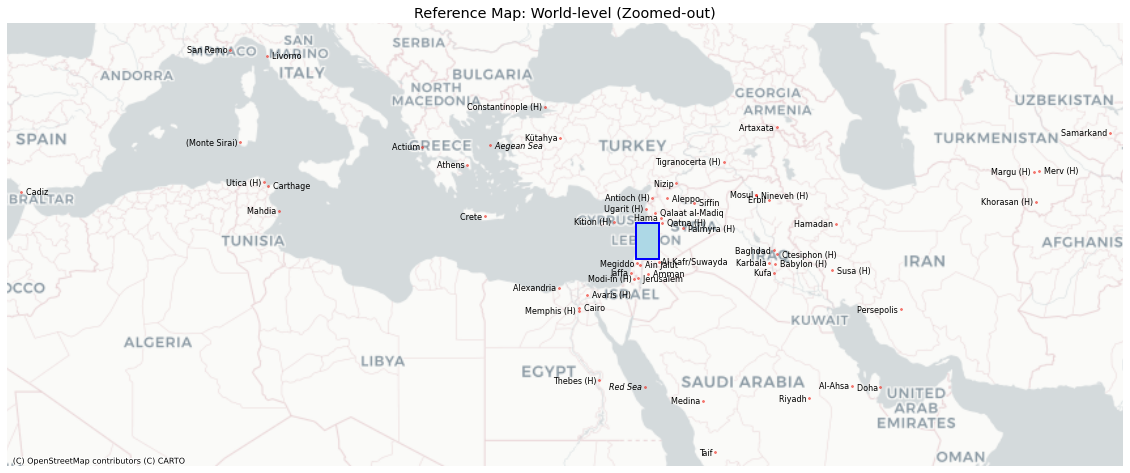

In [80]:
cities = {
    'Actium ': (38.9250, 20.7250),
    '  Aegean Sea': (39.0192, 25.2686),
    '  Ain Jalut': (32.5006, 35.3569),
    'Al-Ahsa ': (25.3833, 49.6000),
    ' Al-Kafr/Suwayda': (32.6733, 36.6416),
    '  Aleppo': (36.2000, 37.1600),
    'Alexandria ': (31.1975, 29.8925),
    '  Amman': (31.9944, 35.9106),
    'Antioch (H) ': (36.2047, 36.1817),
    'Artaxata ': (39.9535, 44.5520),
    'Athens ': (37.9838, 23.7275),
    '  Avaris (H)': (30.7874, 31.8214),
    '  Babylon (H)': (32.5425, 44.4211),
    'Baghdad ': (33.3152, 44.3661),
    '  Cadiz': (36.5350, -6.2975),
    '  Cairo': (30.0444, 31.2358),
    '  Carthage': (36.8581, 10.3308),
    'Constantinople (H) ': (41.0125, 28.9800),
    'Crete ': (35.2100, 24.9100),
    '  Ctesiphon (H)': (33.0936, 44.5806),
    'Doha ': (25.2867, 51.5333),
    'Erbil ': (36.1012, 44.0092),
    'Hama ': (35.1333, 36.7500),
    'Hamadan ': (34.7983, 48.5148),
    'Jaffa ': (32.0496, 34.7588),
    '  Jerusalem': (31.7283, 35.2137),
    'Karbala ': (32.6167, 44.0333),
    'Khorasan (H) ': (36.0000, 62.0000),
    'Kition (H) ': (34.9233, 33.6305),
    'Kufa ': (32.0472, 44.3709),
    'Kütahya ': (39.4200, 29.9857),
    '  Livorno': (43.5485, 10.3106),
    'Mahdia ': (35.5000, 11.0667),
    'Margu (H) ': (37.6000, 61.8333),
    'Medina ': (24.4672, 39.6024),
    'Megiddo ': (32.5779, 35.1800),
    'Memphis (H) ': (29.8447, 31.2508),
    '  Merv (H)': (37.6644, 62.1747),
    'Modi-in (H) ': (31.7039, 34.9878),
    '(Monte Sirai) ': (39.1800, 8.4861),
    'Mosul ': (36.3889, 43.1577),
    'Nizip ': (37.0100, 37.7972),
    '  Nineveh (H)': (36.3594, 43.1528),
    '  Palmyra (H)': (34.5514, 38.2681),
    'Persepolis ': (29.9356, 52.8892),
    '  Qalaat al-Madiq': (35.4100, 36.3900),
    '  Qatna (H)': (34.8350, 36.8658),
    'Red Sea ': (25.3283, 35.6754),
    'Riyadh ': (24.6333, 46.7167),
    'Samarkand ': (39.6508, 66.9654),
    'San Remo ': (43.8160, 7.7761),
    '  Siffin': (35.9500, 39.0167),
    '  Susa (H)': (32.1906, 48.2578),
    'Taif ': (21.2751, 40.4062),
    'Thebes (H) ': (25.7206, 32.6103),
    'Tigranocerta (H) ': (38.1422, 41.0014),
    'Ugarit (H) ': (35.6019, 35.7825),
    'Utica (H) ': (37.0569, 10.0619)
}

opposite_alignment_cities = {'  Aegean Sea','  Ain Jalut',' Al-Kafr/Suwayda','  Aleppo','  Amman','  Avaris (H)','  Babylon (H)',
                             '  Cadiz','  Cairo','  Carthage','  Ctesiphon (H)','  Jerusalem','  Livorno','  Merv (H)',
                             '  Nineveh (H)','  Palmyra (H)','  Qalaat al-Madiq','  Qatna (H)','  Siffin','  Susa (H)'}

geometry = [Point(lon, lat) for lat, lon in cities.values()]
gdf = gpd.GeoDataFrame(cities.keys(), geometry=geometry, columns=['City'])
gdf.crs = "EPSG:4326"

gdf_web_mercator = gdf.to_crs(epsg=3857)

bbox = gdf_web_mercator.total_bounds
minx, miny, maxx, maxy = bbox

m = folium.Map(location=[(miny + maxy) / 2, (minx + maxx) / 2], zoom_start=10)

for city, (lat, lon) in cities.items():
    folium.Marker(location=[lat, lon], popup=city, tooltip=city).add_to(m)

ax = gdf_web_mercator.plot(figsize=(20, 20), alpha=0.7, edgecolor='red', markersize=4)
ctx.add_basemap(ax, crs=gdf_web_mercator.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax.set_xlim(minx-100000, maxx+100000)
ax.set_ylim(miny-100000, maxy+200000)
ax.set_title("Reference Map: World-level (Zoomed-out)")
ax.set_axis_off()

for x, y, label in zip(gdf_web_mercator.geometry.x, gdf_web_mercator.geometry.y, gdf['City']):
    if label in opposite_alignment_cities:
        alignment = 'left'
        x_offset = 5
    else:
        alignment = 'right'
        x_offset = 5

    if label.endswith('Sea') or label.endswith('Sea '):
        label = label
        style = 'italic'
    else:
        style = 'normal'

    ax.text(x + x_offset, y, label, fontsize=8, ha=alignment, va='center', color='black', style=style)

rect_coords = [32.8141, 35.0846, 34.8548, 36.6333]

rect_points = gpd.GeoDataFrame(geometry=[
    Point(rect_coords[1], rect_coords[0]),
    Point(rect_coords[3], rect_coords[2])
], crs="EPSG:4326").to_crs(epsg=3857)

minx_rect, miny_rect = rect_points.geometry.x.min(), rect_points.geometry.y.min()
maxx_rect, maxy_rect = rect_points.geometry.x.max(), rect_points.geometry.y.max()

rect = Rectangle((minx_rect, miny_rect), maxx_rect - minx_rect, maxy_rect - miny_rect,
                 linewidth=2, edgecolor='blue', facecolor='lightblue')
ax.add_patch(rect)

plt.savefig('map.png', bbox_inches='tight', dpi=300)
plt.show()

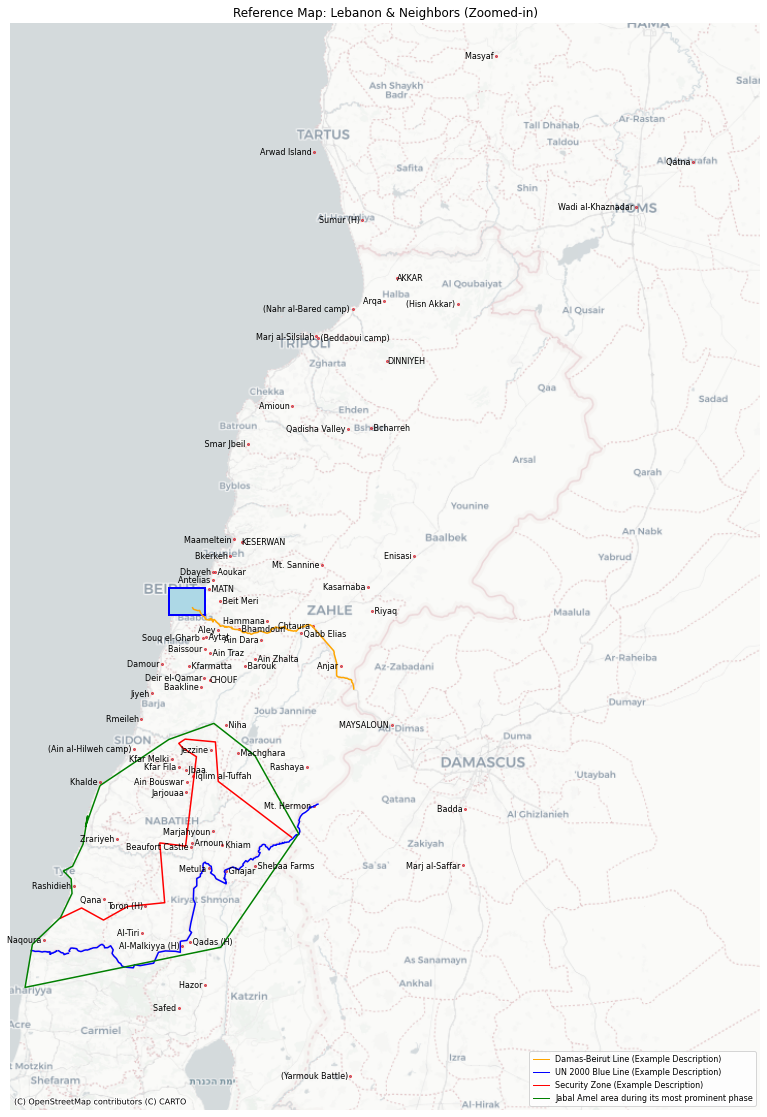

In [13]:
cities = {
    'Ain Bouswar ': (33.4689, 35.5190),
    'Ain Dara ': (33.7833, 35.7167),
    '(Ain al-Hilweh camp) ': (33.5436, 35.3781),
    ' Ain Traz': (33.7550, 35.5806),
    ' Ain Zhalta': (33.7413, 35.7004),
    'AKKAR': (34.5806, 36.0781),
    'Al-Malkiyya (H) ': (33.1053, 35.5081),
    'Al-Tiri ': (33.1333, 35.4000),
    'Aley ': (33.8069, 35.6024),
    'Amioun ': (34.3000, 35.8000),
    'Anjar ': (33.7259, 35.9298),
    'Antelias ': (33.9171, 35.5887),
    ' Arnoun': (33.3333, 35.5333),
    'Arqa ': (34.5306, 36.0458),
    'Arwad Island ': (34.8561, 35.8583),
    ' Aoukar': (33.9336, 35.5956),
    ' Aytat': (33.7916, 35.5703),
    'Baakline ': (33.6797, 35.5583),
    'Badda ': (33.4100, 36.2600),
    'Baissour ': (33.7635, 35.5678),
    ' Barouk': (33.7271, 35.6736),
    ' Bcharreh': (34.2511, 36.0111),
    ' (Beddaoui camp)': (34.4502, 35.8692),
    'Beaufort Castle ': (33.3244, 35.5320),
    ' Beit Meri': (33.8698, 35.6081),
    ' Bhamdoun': (33.8089, 35.6599),
    'Bkerkeh ': (33.9698, 35.6350),
    'CHOUF': (33.6956, 35.5803),
    'Chtaura ': (33.8147, 35.8547),
    'Damour ': (33.7306, 35.4547),
    'Dbayeh ': (33.9353, 35.5897),
    'Deir el-Qamar ': (33.7000, 35.5667),
    'DINNIYEH': (34.3999, 36.0524),
    'Enisasi ': (33.9689, 36.1252),
    ' Ghajar': (33.2726, 35.6236),
    'Hammana ': (33.8252, 35.7333),
    'Hazor ': (33.0167, 35.5670),
    '(Hisn Akkar) ': (34.5250, 36.2417),
    ' Iqlim al-Tuffah': (33.4833, 35.5367),
    'Jarjouaa ': (33.4462, 35.5189),
    ' Jbaa': (33.4963, 35.5176),
    'Jezzine ': (33.5400, 35.5836),
    'Jiyeh ': (33.6657, 35.4268),
    'Kadesh (H)': (34.5575, 36.5200),
    'Kasarnaba ': (33.9023, 36.0021),
    'KESERWAN': (33.9998, 35.6656),
    'Kfar Fila ': (33.5022, 35.4994),
    'Kfar Melki ': (33.5215, 35.4800),
    ' Kfarmatta': (33.7271, 35.5262),
    'Khalde ': (33.4700, 35.2900),
    ' Khiam': (33.3294, 35.6148),
    'Maameltein ': (34.0062, 35.6452),
    ' Machghara': (33.5347, 35.6570),
    'Marj al-Saffar ': (33.2839, 36.2547),
    'Marj al-Silsilah ': (34.4529, 35.8648),
    'Marjahyoun ': (33.3595, 35.5889),
    'Masyaf ': (35.0653, 36.3422),
    ' MATN': (33.8967, 35.5778),
    'MAYSALOUN ': (33.5955, 36.0647),
    'Metula ': (33.2772, 35.5782),
    'Mt. Hermon ': (33.4161, 35.8575),
    'Mt. Sannine ': (33.9500, 35.8800),
    '(Nahr al-Bared camp) ': (34.5131, 35.9611),
    'Naqoura ': (33.1183, 35.1399),
    ' Niha': (33.5955, 35.6241),
    ' Qabb Elias': (33.7986, 35.8250),
    ' Qadas (H)': (33.1140, 35.5274),
    'Qadisha Valley ': (34.2500, 35.9500),
    'Qana ': (33.2083, 35.3002),
    'Qatna ': (34.8350, 36.8658),
    'Rashaya ': (33.5019, 35.8398),
    'Rashidieh ': (33.2377, 35.2192),
    ' Riyaq': (33.8491, 36.0122),
    'Rmeileh ': (33.6083, 35.3981),
    'Safed ': (32.9658, 35.4983),
    ' Shebaa Farms': (33.2833, 35.7000),
    ' Smar Jbeil ': (34.2167, 35.6833),
    'Souq el-Gharb ': (33.7881, 35.5618),
    'Sumur (H) ': (34.7081, 35.9861),
    'Toron (H) ': (33.1940, 35.4097),
    'Wadi al-Khaznadar ': (34.7367, 36.7156),
    '(Yarmouk Battle) ': (32.8141, 35.9548),
    'Zrariyeh ': (33.3421, 35.3327)
}

opposite_alignment_cities = {' Ain Zhalta',' Ain Traz','AKKAR',' Aoukar',' Arnoun',' Aytat',' Barouk',' Bcharreh',' (Beddaoui camp)',
                             ' Beit Meri',' Bhamdoun','CHOUF','DINNIYEH',' Ghajar',' Iqlim al-Tuffah',' Jbaa','KESERWAN',' Kfarmatta',
                             ' Kfarnabrakh',' Khiam',' Maasser el-Chouf',' Machghara',' MATN',' Niha',' Qabb Elias',' Qadas (H)',
                             ' Riyaq',' Shebaa Farms'}

damasbeirutline_coords = [(33.856708, 35.534284),(33.851899, 35.537598),(33.848781, 35.550001),(33.849298, 35.551535),(33.849467, 35.553584),(33.848870, 35.554582),(33.845110, 35.555902),(33.842116, 35.558176),(33.840369, 35.558820),(33.834345, 35.567607),(33.830842, 35.569087),(33.829657, 35.571394),(33.828953, 35.573733),(33.828177, 35.579505),(33.828908, 35.582616),(33.829996, 35.582767),(33.830619, 35.582005),(33.831626, 35.583056),(33.830700, 35.582799),(33.830896, 35.584097),(33.830316, 35.584537),(33.830423, 35.585331),(33.829942, 35.586683),(33.828837, 35.587090),(33.829122, 35.587916),(33.827634, 35.587198),(33.823917, 35.589418),(33.825700, 35.590084),(33.827812, 35.590212),(33.829345, 35.592562),(33.826386, 35.596575),(33.825022, 35.597315),(33.818266, 35.606338),(33.815842, 35.608291),(33.814219, 35.608913),(33.815369, 35.614470),(33.815120, 35.618419),(33.813167, 35.619792),(33.812392, 35.620714),(33.812222, 35.621862),(33.813738, 35.623279),(33.813667, 35.624759),(33.812035, 35.626229),(33.813479, 35.630274),(33.811812, 35.637033),(33.812222, 35.639104),(33.811955, 35.640026),(33.811260, 35.640359),(33.809851, 35.639629),(33.808764, 35.640187),(33.808478, 35.643545),(33.807444, 35.647944),(33.807198, 35.654345),(33.806779, 35.656855),(33.806413, 35.661404),(33.800333, 35.669623),(33.800387, 35.673592),(33.801251, 35.676285),(33.800993, 35.678334),(33.798568, 35.681918),(33.799049, 35.687475),(33.797097, 35.689664),(33.796838, 35.692164),(33.799620, 35.699009),(33.800734, 35.708483),(33.803400, 35.712635),(33.803739, 35.716765),(33.799023, 35.733395),(33.801059, 35.740298),(33.802725, 35.743263),(33.804909, 35.743560),(33.806234, 35.742977),(33.807814, 35.744654),(33.808562, 35.746617),(33.809267, 35.747620),(33.808588, 35.749276),(33.809845, 35.750871),(33.810236, 35.752354),(33.810270, 35.754553),(33.812810, 35.755923),(33.812283, 35.758960),(33.811281, 35.759960),(33.811697, 35.763756),(33.811272, 35.764298),(33.809896, 35.765167),(33.809420, 35.766936),(33.812250, 35.770055),(33.811723, 35.771312),(33.812252, 35.777562),(33.813984, 35.778365),(33.814371, 35.779991),(33.813560, 35.782197),(33.810466, 35.782625),(33.808501, 35.784015),(33.808267, 35.784933),(33.808304, 35.785877),(33.807372, 35.788440),(33.806084, 35.788995),(33.805242, 35.791265),(33.806058, 35.794370),(33.805698, 35.795805),(33.804680, 35.796576),(33.804495, 35.797393),(33.804664, 35.799605),(33.803615, 35.803909),(33.804394, 35.806001),(33.804225, 35.807346),(33.804352, 35.808622),(33.803382, 35.811064),(33.809105, 35.817683),(33.810408, 35.818442),(33.810609, 35.819717),(33.811298, 35.820845),(33.811213, 35.822472),(33.814175, 35.828778),(33.814138, 35.829333),(33.813078, 35.831909),(33.816437, 35.836672),(33.818100, 35.842379),(33.817534, 35.848577),(33.815642, 35.850777),(33.815812, 35.852384),(33.760130, 35.910831),(33.756286, 35.912062),(33.754181, 35.911762),(33.733079, 35.918545),(33.705685, 35.918634),(33.704221, 35.919342),(33.702189, 35.922555),(33.701760, 35.927312),(33.700815, 35.930399),(33.701001, 35.936947),(33.699399, 35.943209),(33.699452, 35.946429),(33.696762, 35.951779),(33.696486, 35.956498),(33.694858, 35.958647),(33.693632, 35.959029),(33.691404, 35.958608),(33.688268, 35.961389),(33.687170, 35.962001),(33.678707, 35.964099),(33.675629, 35.964118),(33.674165, 35.964889)]
UN2000blueline_coords = [(33.094128, 35.103970),(33.094272, 35.108238),(33.093360, 35.113179),(33.092439, 35.115857),(33.092743, 35.125236),(33.092555, 35.126826),(33.092180, 35.129387),(33.091062, 35.135074),(33.091572, 35.136942),(33.092010, 35.139865),(33.091974, 35.145222),(33.091429, 35.147079),(33.091017, 35.148925),(33.090812, 35.150568),(33.091178, 35.150675),(33.091429, 35.152627),(33.091554, 35.155850),(33.085993, 35.155476),(33.086056, 35.156501),(33.086101, 35.157118),(33.086306, 35.157694),(33.086776, 35.158108),(33.087652, 35.158646),(33.087888, 35.158833),(33.088197, 35.159196),(33.088522, 35.159638),(33.088717, 35.160005),(33.088776, 35.160257),(33.088502, 35.161159),(33.088447, 35.161570),(33.088531, 35.161947),(33.088705, 35.162120),(33.088881, 35.162164),(33.088978, 35.162392),(33.088962, 35.162793),(33.088844, 35.163108),(33.089139, 35.164165),(33.089220, 35.164519),(33.089219, 35.164848),(33.089330, 35.165117),(33.089530, 35.165245),(33.089676, 35.165300),(33.089880, 35.165637),(33.089916, 35.166003),(33.090244, 35.166626),(33.090291, 35.166814),(33.090622, 35.167074),(33.090797, 35.167373),(33.090876, 35.167824),(33.090892, 35.168270),(33.091067, 35.168716),(33.090894, 35.169184),(33.091087, 35.169407),(33.091161, 35.169726),(33.091526, 35.170303),(33.091635, 35.170575),(33.091906, 35.170821),(33.091994, 35.171018),(33.092108, 35.171136),(33.092687, 35.171535),(33.092964, 35.171590),(33.093205, 35.171756),(33.093238, 35.172132),(33.093350, 35.172319),(33.093508, 35.172432),(33.093664, 35.172522),(33.093789, 35.172688),(33.093587, 35.173120),(33.093650, 35.173310),(33.093765, 35.173536),(33.093761, 35.173851),(33.093710, 35.174173),(33.093779, 35.174520),(33.093878, 35.174818),(33.093920, 35.175120),(33.093922, 35175508),(33.093911, 35.175876),(33.093861, 35.176276),(33.093862, 35.176679),(33.093893, 35.177061),(33.093879, 35.177287),(33.094021, 35.177677),(33.094058, 35.177984),(33.094040, 35.178313),(33.094008, 35.178501),(33.093101, 35.180094),(33.092715, 35.180843),(33.091630, 35.182528),(33.091008, 35.183662),(33.089584, 35.185671),(33.089357, 35.190097),(33.086092, 35.192868),(33.085200, 35.193194),(33.085304, 35.193544),(33.085518, 35.193734),(33.085675, 35.193972),(33.086033, 35.194395),(33.086118, 35.194681),(33.086168, 35.194935),(33.086111, 35.195590),(33.086124, 35.196135),(33.086185, 35.196621),(33.086486, 35.197086),(33.086803, 35.197964),(33.087069, 35.198465),(33.087591, 35.199994),(33.087700, 35.200591),(33.087663, 35.201080),(33.087714, 35.201468),(33.087727, 35.201810),(33.087792, 35.202149),(33.088215, 35.202961),(33.088373, 35.203464),(33.088462, 35.204054),(33.088496, 35.204392),(33.088450, 35.204747),(33.088326, 35.205153),(33.088151, 35.205529),(33.088115, 35.205923),(33.088197, 35.206621),(33088261, 35.206787),(33.090919, 35.208601),(33.091709, 35.208276),(33.091814, 35.208291),(33.091922, 35.208352),(33.092104, 35.208225),(33.092293, 35.207870),(33.092574, 35.207594),(33.092736, 35.207496),(33.092907, 35.207234),(33.093160, 35.206991),(33.093421, 35.206793),(33.093977, 35.206631),(33.094273, 35.206685),(33.094561, 35.206839),(33.094949, 35.207135),(33.095395, 35.207776),(33.095997, 35.208501),(33.096868, 35.208868),(33.097419, 35.209189),(33.098356, 35.209915),(33.099803, 35.211408),(33.099887, 35.211708),(33.099765, 35.213426),(33.099801, 35.215090),(33.099866, 35.215627),(33.099925, 35.216414),(33.099770, 35.216924),(33.099099, 35.218748),(33.099341, 35.219532),(33.099295, 35.220857),(33.099311, 35.221519),(33.099247, 35.222144),(33.099249, 35.222232),(33.098770, 35.223688),(33.098690, 35.224182),(33.098675, 35.225570),(33.098630, 35.226115),(33.098488, 35.226711),(33.098302, 35.227015),(33.097547, 35.227607),(33.097104, 35.227874),(33.096640, 35.227985),(33.096334, 35.228037),(33.095140, 35.229253),(33.094507, 35.230080),(33.093743, 35.231389),(33.093352, 35.232115),(33.093212, 35.232846),(33.093212, 35.233388),(33.093057, 35.234086),(33.092595, 35.235503),(33.092271, 35.236867),(33.092166, 35.237702),(33.092274, 35.238921),(33.092461, 35.239767),(33.092663, 35.240467),(33.093164, 35.242393),(33.093422, 35.243109),(33.093997, 35.244103),(33.094517, 35.245294),(33.094597, 35.245700),(33.094767, 35.246370),(33.094832, 35.246727),(33.094866, 35.247009),(33.095032, 35.247726),(33.095198, 35.248175),(33.095855, 35.251466),(33.095854, 35.251882),(33.095732, 35.252949),(33.095590, 35.253423),(33.095409, 35.254302),(33.095466, 35.254701),(33.095466, 35.255312),(33.096637, 35.259054),(33.096789, 35.259840),(33.096949, 35.260976),(33.097086, 35.261504),(33.097493, 35.261972),(33.097906, 35.262237),(33.098144, 35.262708),(33.098435, 35.263449),(33.098487, 35.264929),(33.098566, 35.265496),(33.099042, 35.266796),(33.100204, 35.270508),(33.100387, 35.272065),(33.100411, 35.272584),(33.100483, 35.273258),(33.100635, 35.277281),(33.100743, 35.277703),(33.100779, 35.278151),(33.100779, 35.278532),(33.100706, 35.279654),(33.100991, 35.280989),(33.101164, 35.281443),(33.101655, 35.282080),(33.102801, 35.283742),(33.103247, 35.284647),(33.104273, 35.286116),(33.104978, 35.286827),(33.105393, 35.287340),(33.107160, 35.291026),(33.107526, 35.292204),(33.107656, 35.292477),(33.107742, 35.292815),(33.107985, 35.293472),(33.108086, 35.294269),(33.108014, 35.294647),(33.105013, 35.299478),(33.102665, 35.300755),(33.100491, 35.300960),(33.100768, 35.309348),(33.105012, 35.317154),(33.095933, 35.323873),(33.088039, 35.320974),(33.082574, 35.325323),(33.076501, 35.332570),(33.067999, 35.338368),(33.065265, 35.343804),(33.060103, 35.347065),(33.057673, 35.353588),(33.057977, 35.357937),(33.057065, 35.359386),(33.055851, 35.377505),(33.062532, 35.380766),(33.060710, 35.395624),(33.066177, 35.431499),(33.090468, 35.444545),(33.093504, 35.462663),(33.092593, 35.490204),(33.090468, 35.502525),(33.114146, 35.502525),(33.115360, 35.504699),(33.116877, 35.519919),(33.134783, 35.532602),(33.139031, 35.527166),(33.154808, 35.530428),(33.198787, 35.542386),(33.208793, 35.537313),(33.232439, 35.538400),(33.238501, 35.546372),(33.254866, 35.546372),(33.259109, 35.555794),(33.265169, 35.556156),(33.266078, 35.559780),(33.269411, 35.559418),(33.273349, 35.564491),(33.283650, 35.562679),(33.288496, 35.563766),(33.291223, 35.568840),(33.288193, 35.571014),(33.287588, 35.576812),(33.283347, 35.580798),(33.282135, 35.584784),(33.271834, 35.586596),(33.267896, 35.583335),(33.266381, 35.584422),(33.261230, 35.593481),(33.254260, 35.597830),(33.243047, 35.624283),(33.244562, 35.623196),(33.246381, 35.625008),(33.250018, 35.622834),(33.253048, 35.623196),(33.253654, 35.621746),(33.253413, 35.620090),(33.255720, 35.618513),(33.256708, 35.620484),(33.259674, 35.621272),(33.262311, 35.621272),(33.264947, 35.623242),(33.270219, 35.619695),(33.273514, 35.621666),(33.280433, 35.642553),(33.274503, 35.658712),(33.279115, 35.662653),(33.281422, 35.666594),(33.284057, 35.670141),(33.286693, 35.668958),(33.294599, 35.676840),(33.291964, 35.681175),(33.299211, 35.690240),(33.296246, 35.695757),(33.299870, 35.698122),(33.300858, 35.702063),(33.302834, 35.704428),(33.303164, 35.708369),(33.305140, 35.711127),(33.312715, 35.715068),(33.312715, 35.711915),(33.315679, 35.710339),(33.319631, 35.713886),(33.322266, 35.712704),(33.325559, 35.714674),(33.326876, 35.718615),(33.330169, 35.720980),(33.330827, 35.724921),(33.329510, 35.728862),(33.325888, 35.729650),(33.324241, 35.733985),(33.318426, 35.738644),(33.325922, 35.744044),(33.326283, 35.748366),(33.329172, 35.749662),(33.328811, 35.757441),(33.330616, 35.758306),(33.331339, 35.766517),(33.333541, 35.766765),(33.332263, 35.769060),(33.332583, 35.773267),(33.334820, 35.774032),(33.333222, 35.777857),(33.335778, 35.780152),(33.334820, 35.783977),(33.335778, 35.785890),(33.336098, 35.791627),(33.339294, 35.794305),(33.343767, 35.801955),(33.349519, 35.807693),(33.350477, 35.811135),(33.352394, 35.810753),(33.352075, 35.815343),(33.353033, 35.818403),(33.360062, 35.820698),(33.365813, 35.819168),(33.369966, 35.814578),(33.381465, 35.819933),(33.384020, 35.818020),(33.392643, 35.822228),(33.398391, 35.827583),(33.402223, 35.835615),(33.408290, 35.844413),(33.413399, 35.846708),(33.413159, 35.845994),(33.413534, 35.848685),(33.412411, 35.850928),(33.414657, 35.853170),(33.413908, 35.856310),(33.415873, 35.857455),(33.418094, 35.864407),(33.419383, 35.865094),(33.420530, 35.870845)]
securityzone_coords = [(33.345601, 35.800217),(33.470749, 35.603447),(33.558245, 35.595952),(33.564492, 35.515370),(33.555122, 35.498504),(33.545751, 35.507874),(33.525445, 35.545354),(33.326922, 35.516547),(33.334007, 35.447956),(33.201021, 35.460899),(33.192613, 35.362426),(33.162336, 35.298118),(33.189249, 35.239838),(33.165701, 35.181559)]
jabalamel_coords = [(33.461528, 35.288899),(33.563787, 35.472148),(33.599445, 35.591845),(33.527869, 35.701116),(33.354267, 35.817678),(33.101670, 35.610118),(33.012126, 35.089315),(33.108157, 35.108846),(33.168002, 35.183786),(33.221633, 35.214323),(33.253796, 35.212061),(33.271449, 35.191326),(33.282165, 35.215831),(33.331316, 35.243729),(33.393975, 35.255793),(33.370131, 35.250152),(33.461528, 35.288899)]

geometry = [Point(lon, lat) for lat, lon in cities.values()]
gdf = gpd.GeoDataFrame(cities.keys(), geometry=geometry, columns=['City'])
gdf.crs = "EPSG:4326"

line = LineString([(lon, lat) for lat, lon in damasbeirutline_coords])
line2 = LineString([(lon, lat) for lat, lon in UN2000blueline_coords])
line3 = LineString([(lon, lat) for lat, lon in securityzone_coords])
line4 = LineString([(lon, lat) for lat, lon in jabalamel_coords])
gdf_line = gpd.GeoDataFrame(geometry=[line], crs="EPSG:4326")
gdf_line2 = gpd.GeoDataFrame(geometry=[line2], crs="EPSG:4326")
gdf_line3 = gpd.GeoDataFrame(geometry=[line3], crs="EPSG:4326")
gdf_line4 = gpd.GeoDataFrame(geometry=[line4], crs="EPSG:4326")

gdf_web_mercator = gdf.to_crs(epsg=3857)
gdf_line_web_mercator = gdf_line.to_crs(epsg=3857)
gdf_line2_web_mercator = gdf_line2.to_crs(epsg=3857)
gdf_line3_web_mercator = gdf_line3.to_crs(epsg=3857)
gdf_line4_web_mercator = gdf_line4.to_crs(epsg=3857)

bbox = gdf_web_mercator.total_bounds
minx, miny, maxx, maxy = bbox

m = folium.Map(location=[(miny + maxy) / 2, (minx + maxx) / 2], zoom_start=10)

for city, (lat, lon) in cities.items():
    folium.Marker(location=[lat, lon], popup=city, tooltip=city).add_to(m)

ax = gdf_web_mercator.plot(figsize=(20, 20), alpha=0.7, edgecolor='red', markersize=4)
gdf_line_web_mercator.plot(ax=ax, color='orange', linewidth=1.5)
gdf_line2_web_mercator.plot(ax=ax, color='blue', linewidth=1.5)
gdf_line3_web_mercator.plot(ax=ax, color='red', linewidth=1.5)
gdf_line4_web_mercator.plot(ax=ax, color='green', linewidth=1.5)
ctx.add_basemap(ax, crs=gdf_web_mercator.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax.set_xlim(minx-10000, maxx+20000)
ax.set_ylim(miny-10000, maxy+10000)
ax.set_title("Reference Map: Lebanon & Neighbors (Zoomed-in)")
ax.set_axis_off()

for x, y, label in zip(gdf_web_mercator.geometry.x, gdf_web_mercator.geometry.y, gdf['City']):
    if label in opposite_alignment_cities:
        alignment = 'left'
        x_offset = 5
    else:
        alignment = 'right'
        x_offset = 5
    ax.text(x + x_offset, y, label, fontsize=8, ha=alignment, va='center')

rect_coords = [33.8400, 35.4730, 33.9000, 35.5670]

rect_points = gpd.GeoDataFrame(geometry=[
    Point(rect_coords[1], rect_coords[0]),
    Point(rect_coords[3], rect_coords[2])
], crs="EPSG:4326").to_crs(epsg=3857)

minx_rect, miny_rect = rect_points.geometry.x.min(), rect_points.geometry.y.min()
maxx_rect, maxy_rect = rect_points.geometry.x.max(), rect_points.geometry.y.max()

rect = Rectangle((minx_rect, miny_rect), maxx_rect - minx_rect, maxy_rect - miny_rect,
                 linewidth=2, edgecolor='blue', facecolor='lightblue')
ax.add_patch(rect)

legend_elements = [
    Line2D([0], [0], color='orange', lw=1, label='Damas-Beirut Line (Example Description)'),
    Line2D([0], [0], color='blue', lw=1, label='UN 2000 Blue Line (Example Description)'),
    Line2D([0], [0], color='red', lw=1, label='Security Zone (Example Description)'),
    Line2D([0], [0], color='green', lw=1, label='Jabal Amel area during its most prominent phase'),
]

ax.legend(handles=legend_elements, loc='lower right', fontsize=8)

plt.savefig('map_zoom.png', bbox_inches='tight', dpi=300)
plt.show()

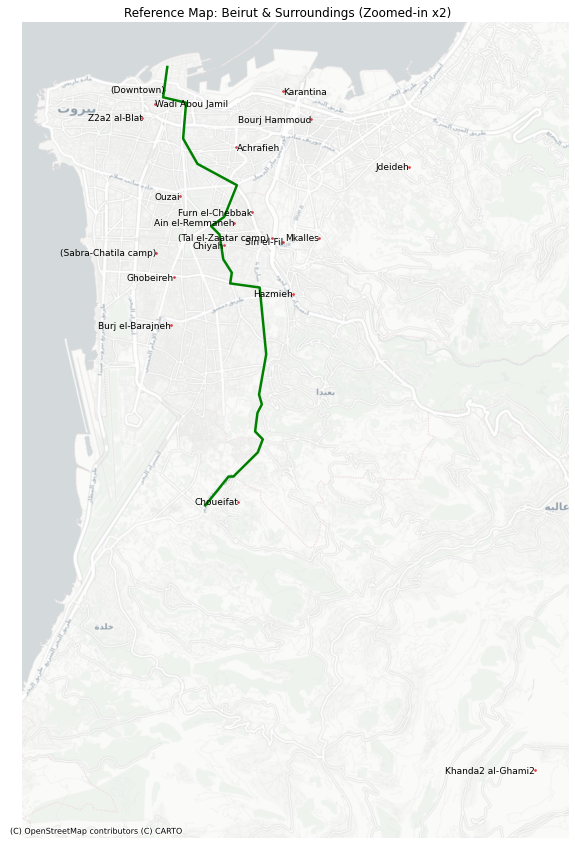

In [14]:
cities = {
    'Achrafieh': (33.8876, 35.5208),
    'Ain el-Remmaneh': (33.8710, 35.5202),
    'Burj el-Barajneh': (33.8483, 35.5033),
    'Bourj Hammoud': (33.8938, 35.5406),
    'Chiyah': (33.8660, 35.5175),
    'Choueifat': (33.8093, 35.5212),
    '(Downtown)': (33.9003, 35.5017),
    'Furn el-Chebbak': (33.8733, 35.5250),
    'Ghobeireh': (33.8589, 35.5042),
    'Hazmieh': (33.8553, 35.5359),
    'Jdeideh': (33.8833, 35.5667),
    'Karantina': (33.9000, 35.5333),
    'Khanda2 al-Ghami2': (33.7500, 35.6002),
    'Mkalles': (33.8677, 35.5428),
    'Ouzai': (33.8768, 35.5059),
    'Sin el-Fil': (33.8667, 35.5333),
    '(Sabra-Chatila camp)': (33.8644, 35.4994),
    '(Tal el-Zaatar camp) ': (33.8677,35.5303),
    'Wadi Abou Jamil': (33.8972, 35.4992),
    'Z2a2 al-Blat': (33.8942, 35.4958),
}

opposite_alignment_cities = {'Achrafieh','Karantina','Wadi Abou Jamil'}

greenline_coords = [(33.905638, 35.502485),(33.898681, 35.501337),(33.897479, 35.507443),(33.889568, 35.506648),(33.883987, 35.510461),(33.879271, 35.520956),(33.872280, 35.517577),(33.870218, 35.514121),(33.868372, 35.516333),(33.862943, 35.517323),(33.862764, 35.517452),(33.859942, 35.519603),(33.857585, 35.519172),(33.856684, 35.527011),(33.841924, 35.528749),(33.833030, 35.526845),(33.830875, 35.527590),(33.829019, 35.526431),(33.824892, 35.525797),(33.823150, 35.527839),(33.820261, 35.526514),(33.814942, 35.520056),(33.814919, 35.518732),(33.808315, 35.512329)]

geometry = [Point(lon, lat) for lat, lon in cities.values()]
gdf = gpd.GeoDataFrame(cities.keys(), geometry=geometry, columns=['City'])
gdf.crs = "EPSG:4326"

line = LineString([(lon, lat) for lat, lon in greenline_coords])
gdf_line = gpd.GeoDataFrame(geometry=[line], crs="EPSG:4326")

gdf_web_mercator = gdf.to_crs(epsg=3857)
gdf_line_web_mercator = gdf_line.to_crs(epsg=3857)

bbox = gdf_web_mercator.total_bounds
minx, miny, maxx, maxy = bbox

m = folium.Map(location=[(miny + maxy) / 2, (minx + maxx) / 2], zoom_start=10)

for city, (lat, lon) in cities.items():
    folium.Marker(location=[lat, lon], popup=city, tooltip=city).add_to(m)

ax = gdf_web_mercator.plot(figsize=(15, 15), alpha=0.7, edgecolor='red', markersize=3)
gdf_line_web_mercator.plot(ax=ax, color='green', linewidth=2.5)
ctx.add_basemap(ax, crs=gdf_web_mercator.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax.set_xlim(minx-4000, maxx+1000)
ax.set_ylim(miny-2000, maxy+2000)
ax.set_title("Reference Map: Beirut & Surroundings (Zoomed-in x2)")
ax.set_axis_off()

for x, y, label in zip(gdf_web_mercator.geometry.x, gdf_web_mercator.geometry.y, gdf['City']):
    if label in opposite_alignment_cities:
        alignment = 'left'
        x_offset = 5
    else:
        alignment = 'right'
        x_offset = 5
    ax.text(x + x_offset, y, label, fontsize=9, ha=alignment, va='center')

plt.savefig('map_second_zoom.png', bbox_inches='tight', dpi=300)
plt.show()

In [82]:
output_notebook()
warnings.filterwarnings('ignore')

data = {
    "name": ["AL","ADF","ALA","LFr","ADLP","LFo-M","↪ GoC","LRP","Marada-M","↪ KRF","Kataeb","↪ Tigers","NLP","Future","LFo-P","LNM","LAA","PLA","PSP","↪ PG","LCP","PNO","↪ EoW","SSNP","↪ Mourabitoun","INM","CB","CU","LNRF","M8","↪ LRR","Amal","ARF","FPM","Hezb","IJO","LDP","Marada-P","M14","PLO","ADP","Fatah","Saaika","PFLP","SNF","NB","AFL","SLA"],
    "type": ["Coalition","Military/Militia","Military/Militia","Coalition","Party","Military/Militia","Military/Militia","Party","Military/Militia","Military/Militia","Party","Military/Militia","Party","Party","Party","Coalition","Military/Militia","Military/Militia","Party","Military/Militia","Party","Party","Military/Militia","Party","Military/Militia","Party","Party","Party","Coalition","Coalition","Military/Militia","Party","Party","Party","Party","Military/Militia","Party","Party","Coalition","Coalition","Party","Party","Party","Party","Coalition","Party","Military/Militia","Military/Militia"],
    "start": ["1945-03","1976-10","1947-05","1976-06","1921-10","1976-01","1975-09","1972-01","1967-01","1961-01","1936-11","1968-10","1958-09","1995-01","1994-04","1969-01","1976-01","1975-08","1949-05","1970-01","1964-01","1973-01","1975-05","1932-11","1975-01","1957-01","1934-01","1959-01","1982-07","2005-03","1975-01","1974-07","1890-01","1994-07","1982-01","1983-01","2001-07","1991-04","2005-03","1964-05","1974-01","1959-10","1966-09","1967-08","1951-01","1943-08","1976-01","1977-10"],
    "end": ["2024-12","1983-06","1949-12","1986-12","2024-12","1994-03","1990-10","1994-12","1991-03","1980-11","2024-12","1980-08","2024-12","2024-12","2024-12","1982-06","1977-02","1994-06","2024-12","1990-12","2024-12","2024-12","2024-12","2024-12","1985-06","1991-12","1958-12","1970-12","1999-12","2024-12","1991-09","2024-12","2024-12","2024-12","2024-12","1992-04","2024-12","2024-12","2016-03","2024-12","2024-12","2024-12","2024-12","2024-12","1952-12","2024-12","1978-03","2000-05"],
    "flag": ["ADF_Flag.png","ADF_Flag.png","ALA_Flag.png","LFr_Flag.png","ADLP_Flag.png","LFr_Flag.png","GoC_Flag.png","White.png","MaradaM_Flag.png","Kataeb_Flag.png","Kataeb_Flag.png","Tigers_Flag.png","NLP_Flag.png","Future_Flag.png","Ouwet_Flag.png","White.png","LAA_Flag.png","PLA_Flag.png","PSP_Flag.png","LCP_Flag.png","LCP_Flag.png","PNO_Flag.png","EoW_Flag.png","SSNP_Flag.png","Mourabitoun_Flag.png","Mourabitoun_Flag.png","White.png","White.png","LNRF_Flag.png","White.png","LRR_Flag.png","Amal_Flag.png","ARF_Flag.png","FPM_Flag.png","Hezb_Flag.png","White.png","LDP_Flag.png","MaradaP_Flag.png","M14_Flag.png","PLO_Flag.png","ADP_Flag.png","Fatah_Flag.png","Saika_Flag.png","PFLP_Flag.png","White.png","NB_Flag.png","AFL_Flag.png","SLA_Flag.png"],
    "members": [["ADF","ALA"],[],[],["↪ LFo-M","ADLP","LRP","↪ GoC","Kataeb","↪ KRF","Marada-M","NLP","↪ Tigers"],[],[],[],[],[],[],[],[],[],[],[],["LAA","LCP","↪ PG","PNO","PSP","↪ PLA","SSNP","↪ EoW","INM","↪ Mourabitoun"],[],[],[],[],[],[],[],[],[],[],[],[],["LCP","↪ PG","PSP","↪ PLA","SSNP","↪ EoW"],["Amal","ARF","FPM","Hezb","LDP","PNO","Marada-P","SSNP","↪ EoW","ADP"],[],[],[],[],[],[],[],[],["Future","Kataeb","LFo-P","NLP","PSP"],["Fatah","Saaika","PFLP"],[],[],[],[],["NB","SSNP","ARF"],[],[],[]],
    "full_name": ["Arab League / Jem3it el-Douwal el-3arabieh","Arab Deterrent Force / Ouwet el-rade3 el-3arabieh","Arab Liberation Army / Jech el-Inqaz el-3arabeh","Lebanese Front / El-Jabha el-Lebnenieh","Armenian Democratic Liberal Party / Ramgavar","Lebanese Forces / El-Ouwet el-Lebnenieh","Guadrians of the Cedars / 7erras el-Arz","Lebanese Renewal Party / 7ezb el-Tejdid el-Lebneneh","Marada Brigade / Liwe2 el-Marada","Kataeb Regulatory Forces / Ouwet el-Kataeb el-Nizamieh","Phalangist Party / El-Kataeb el-Lebnenieh","Tigers Militia / Noumour el-A7rar","National Liberal Party / 7ezb el-Wataniyyin el-A7rar","Future Movement / Tayyar el-Mesta2bal","Lebanese Forces / El-Ouwwet el-Lebnenieh","Lebanese National Movement / El-7arakeh el-Watanieh el-Lebnenieh","Lebanese Arab Army / Jech Lebnen el-3arabeh","People's Liberation Army / Jech el-Te7rir el-Cha3beh","Progressive Socialist Party / El-7ezb el-Ta2addoumeh el-Ichtirakeh","Popular Guard / El-7aras el-Cha3beh","Lebanese Communist Party / El-7ezb el-Chouyou3eh el-Lebneneh","Popular Nasserist Organization / El-Tonzim el-Cha3beh el-Nassereh","Eagles of the Whirlwind / Nousour el-Zawba3a","Syrian Social Nationalist Party / El-7ezb el-Soureh el-2awmeh el-Ijtime3eh","The Sentinels / Al-Mourabitoun","Independent Nasserist Movement / 7arakit el-Nassirieh el-Mesta2ellin.","Constitutional Bloc / El-Ketleh el-Doustourieh","Constitutional Union Party / 7ezb el-Itti7ad el-Doustoureh","Lebanese National Resistance Front / Jabhit el-Mou2ewameh el-Watanieh el-Lebnenieh","March 8 Bloc / Ta7alof 8 Azar","Lebanese Resistance Regiments / Afwej el-Mou2ewameh el-Lebnenieh","Amal Movement / 7arakit Amal","Armenian Revolutionary Federation / Dashnak","Free Patriotic Movement / El-Tayyar el-Wataneh el-7orr","Hezbollah / El-Mou2ewameh el-Eslemieh bi Lebnen","Islamic Jihad Organization / 7arakit el-jihad el Eslemeh","Lebanese Democratic Party / El-7ezb el-Demokrateh el-Lebneneh","Marada Movement / Tayyar el-Marada","March 14 Bloc / Ta7alof 14 Azar","Palestine Liberation Organization / Mnazzamit el-Ta7rir el-Folostinieh","Arab Democratic Party / El 7ezb el-3arabe el-democrateh","Fatah / Fate7","Al-Sa'ika / El-Sa2ika","Popular Front for the Liberation of Palestine / El-Jebha el-Cha3bieh la Te7rir Folostine","Social National Front / El-Jebha el-Watanieh el-Ijtima3ieh","National Bloc / El-Ketleh el-Watanieh","Army of Free Lebanon / Jech Lebnen el-7orr","South Lebanon Army / Jech Lebnen el-Jnoubeh"],
    "founder": ["Bechara el-Khoury + Riad al-Solh + Reps. from Egypt+Iraq+Syria+Jordan","Arab League","Arab League","Pierre Gemayel + Camille Chamoun + Sleiman Frangieh","Arshak Jamalyan","Bachir Gemayel","Etienne Sakr","Etienne Sakr","Sleiman Frangieh","Pierre Gemayel + William Hawi","Pierre Gemayel","Camille Chamoun","Camille Chamoun","Rafic Hariri","Samir Geagea","Kamal Joumblatt","Ahmed Al-Khatib","Kamal Joumblatt","Kamal Joumblatt","George Hawi","Youssef Yazbek","Maarouf Saad","Inaam Raad","Antoun Saadeh","Ibrahim Kulaylat","Ibrahim Kulaylat","Bechara el-Khoury","Fouad Chehab","George Hawi + Muhsin Ibraim + Hussein Hamdan","Hassan Nasrallah + Nabih Berri","Moussa al-Sadr","Moussa al-Sadr","Christapor Mikaelian + Simon Zavarian + Stepan Zorian","Michel Aoun","Sobhi al-Tufaili + Abbas al-Moussawi + Hassan Nasrallah","Imad Mughniyeh","Talal Arslan","Sleiman Frangieh, Jr.","Saad Hariri + Walid Joumblatt + Samir Geagea","Ahmad Shukeiri","Ali Eid","Yasser Arafat","Salah Jadid","George Habash","Camille Chamoun + Pierre Gemayel","Emile Eddé","Antoine Barakat","Saad Haddad"],
    "HQ": ["Cairo, Egypt","Chtaura, Lebanon","Damascus, Syria","East-Beirut, Lebanon","Yerevan, Armenia","Karantina, Beirut, Lebanon","Achrafieh, Beirut, Lebanon","Unknown","Zgharta, Lebanon","Achrafieh, Beirut, Lebanon","Saifi, Beirut, Lebanon","Achrafieh, Beirut, Lebanon","Achrafieh, Beirut, Lebanon","Beirut, Lebanon","Maarab, Lebanon","Aley, Lebanon","Hasbaya, Lebanon","Baakline, Lebanon","Wata el-Msaytbeh, Lebanon","Al-Zarif, Beirut, Lebanon","Beirut, Lebanon","Sidon, Lebanon","No official HQ","Beirut, Lebanon","Mazraa, Beirut, Lebanon","Mazraa, Beirut, Lebanon","Beirut, Lebanon","Beirut, Lebanon","Beirut + Kfar Remen, Lebanon","No official HQ","Beirut, Lebanon","Jnah, Beirut, Lebanon","Yerevan, Armenia","Sin el-Fil, Beirut, Lebanon","Beirut, Lebanon","Baalbek + Beirut, Lebanon","Choueifat, Beirut, Lebanon","Zgharta, Lebanon","No official HQ","Al-Bireh, West Bank, Palestine","Tripoli, Lebanon","Ramallah, West Bank, Palestine","Damascus, Syria","Damascus, Syria","No official HQ","Gemmayze, Beirut, Lebanon","Beirut, Lebanon","Marjahyoun, Lebanon"],
    "religion": ["Multi-religious (Sunni-dominated)","Multi-religious (Sunni-dominated)","Multi-religious (Sunni-dominated)","Mainly Christian (Maronite, Orthodox, Catholic)","Armenian Apostolic (with some Armenian Catholics)","Mainly Christian (Maronite)","Exclusively Christian (Maronite)","Exclusively Christian (Maronite)","Mainly Christian (Maronite)","Mainly Christian (Maronite)","Mainly Christian (Maronite)","Mainly Christian (Maronite)","Mainly Christian (Maronite)","Mainly Sunni Muslim","Mainly Christian (Maronite)","Mainly Sunni & Druze","Multi-religious (but Sunni Muslim-dominated)","Mainly Druze","Mainly Druze","Multi-religious","Multi-religious (but mostly Shia & Greek Orthodox)","Mainly Sunni Muslim","Multi-religious (but Greek Orthodox-dominated)","Multi-religious (but Greek Orthodox-dominated)","Mainly Sunni & Shia Muslim","Mainly Sunni & Shia Muslim","Multi-religious (but Maronite-dominated)","Multi-religious (but mostly Maronite & Sunni)","Multi-religious","Multi-religious","Mainly Shia Muslim","Mainly Shia Muslim","Exclusively Armenian Apostolic","Mainly Christian (Maronite)","Mainly Shia Muslim","Mainly Shia Muslim","Mainly Druze","Mainly Christian (Maronite)","Multi-religious (but Sunni & Maronite-dominated)","Mainly Sunni Muslim","Mainly Alawite Muslim","Mainly Sunni Muslim","Mainly Alawite Muslim","Mainly Sunni Muslim","Mainly Christian (Maronite)","Mainly Christian (Maronite)","Mainly Christian (Maronite)","Multi-religious (but mainly Shia & Christian)"],
    "note": ["","Mostly Syrian soldiers","","","","Main militia of Lebanese Front","","Ideology: Phoenicianism","In Leb. Front until 1978 Ehden massacre","","","","","","Continuation of Lebanese Forces militia","","Split from Lebanese Army","In LNRF until dissolution in 1994","In March 14 coalition until 2009","In LNRF until dissolution in 1990","","In March 8 coalition until 2019","Ideology: Pan-Syrian identity","","Involved in 1957-58 revolution vs Chamoun","Did not join LNRF + Politically irrelevant since 1991","","Continuation of CB. Ideology: Chehabism","Continuation of LNM","","","","","","","Merged into Hezbollah in 1992","","Continuation of the Marada Brigades militia","","","","","","","Aim: Overthrow Bechara el-Khoury","","Split from Leb. Army allied with LFr","Heavily supported by Israel"]
}

df = pd.DataFrame(data)
df["start"] = pd.to_datetime(df["start"])
df["end"] = pd.to_datetime(df["end"])

color_map = {"Party": "blue", "Military/Militia": "lightcoral", "Coalition": "lightgreen"}
bar_height = 0.8

plot_data = df[df['type'].isin(["Party","Military/Militia"])]
coalitions = df[df['type'] == "Coalition"]
plot_data["color"] = plot_data["type"].map(color_map)

source = ColumnDataSource(plot_data)

y_range_map = {name: i for i, name in enumerate(plot_data["name"])}

p = figure(
    title="Timeline of Political Coalitions, Parties, and Militias/Military Groups Operating in Lebanon",
    x_range=(pd.to_datetime("1890-01"), pd.to_datetime("2024-12")),
    y_range=list(plot_data["name"]),
    plot_width=1000,
    plot_height=400,
    tools="pan,box_zoom,reset,save",
    toolbar_location="above",
)

def add_bars():
    bar_renderers = []

    for _, row in plot_data.iterrows():
        bar_renderer = p.hbar(
            y="name",
            left="start",
            right="end",
            height=bar_height,
            color="color",
            legend_field="type",
            source=source,
        )
        bar_renderers.append(bar_renderer)

    return bar_renderers

bar_renderers = add_bars()

def add_coalition_patches(): 
    patch_data = {
        'x': [],
        'y': [],
        'width': [],
        'height': [],
        'name': [],
        'start': [],
        'end': [],
        'flag': [],
        'full_name': [],
        'HQ': [],
        'founder': [],
        'religion': [],
        'note': []
    }
    
    for _, coalition in coalitions.iterrows():
        member_names = coalition["members"]
        member_indices = [y_range_map[name] for name in member_names if name in y_range_map]
        
        if member_indices:
            top = max(member_indices) + 1
            bottom = min(member_indices)
            
            patch_data['x'].append(pd.to_datetime(coalition["start"]) + ((pd.to_datetime(coalition["end"]) - pd.to_datetime(coalition["start"])) / 2))
            patch_data['y'].append((top + bottom) / 2)
            patch_data['width'].append(pd.to_datetime(coalition["end"]) - pd.to_datetime(coalition["start"]))
            patch_data['height'].append(top - bottom)
            patch_data['name'].append(coalition["name"])
            patch_data['start'].append(coalition["start"])
            patch_data['end'].append(coalition["end"])
            patch_data['flag'].append(coalition["flag"])
            patch_data['full_name'].append(coalition["full_name"])
            patch_data['HQ'].append(coalition["HQ"])
            patch_data['founder'].append(coalition["founder"])
            patch_data['religion'].append(coalition["religion"])
            patch_data['note'].append(coalition["note"])
    
    source = ColumnDataSource(patch_data)
    
    p.rect(
        x='x', y='y', width='width', height='height', 
        source=source, fill_alpha=0.4, fill_color="lightgreen", 
        line_color="darkgreen", line_width=2
    )

    for _, coalition in coalitions.iterrows():
        member_names = coalition["members"]
        member_indices = [y_range_map[name] for name in member_names if name in y_range_map]
        
        if member_indices:
            top = max(member_indices) + 1
            bottom = min(member_indices)
            
            label_x = pd.to_datetime(coalition["start"]) + (
                pd.to_datetime(coalition["end"]) - pd.to_datetime(coalition["start"])
            ) / 2
            label_y = ((top - 1) + bottom) / 2
        
            label = Label(
                x=label_x,
                y=label_y,
                text=coalition["name"],
                text_align="center",
                text_baseline="bottom",
                text_color="black",
                text_font_size="8pt",
            )
            p.add_layout(label)
        
hover = HoverTool(
    tooltips="""
    <div>
        <div>
            <img src="https://raw.githubusercontent.com/Elpazzu/Lebanese_History/data/@flag" alt="Flag" style="width:80px;height:80px;" />
        </div>
        <div>
            <span style="font-size: 12px; font-weight: bold;">Full Name:</span> @full_name<br>
            <span style="font-size: 12px; font-weight: bold;">Founder:</span> @founder<br>
            <span style="font-size: 12px; font-weight: bold;">HQ:</span> @HQ<br>
            <span style="font-size: 12px; font-weight: bold;">Religion:</span> @religion<br>
            <span style="font-size: 12px; font-weight: bold;">Note:</span> @note
        </div>
    </div>
    """,
    renderers=bar_renderers,
)
p.add_tools(hover)

add_bars()
add_coalition_patches()

coalition_renderer = p.renderers[-1]
coalition_legend_item = LegendItem(label="Coalitions", renderers=[coalition_renderer])
p.legend.items.append(coalition_legend_item)

p.legend.title = "Legend"
p.legend.location = "top_left"
p.legend.click_policy = "hide"
p.legend.label_text_font_size = "8pt"
p.legend.title_text_font_size = "9pt"

p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Parties & Militias/Military Groups"
p.yaxis.major_label_text_font_size = "6.5pt"

linked_entities = {
    'x_start': [pd.to_datetime("1974-07"), pd.to_datetime("1932-11"), pd.to_datetime("1964-01"), pd.to_datetime("1958-09"), pd.to_datetime("1936-11"), pd.to_datetime("1972-01"), pd.to_datetime("1957-01")],
    'x_end': [pd.to_datetime("1975-01"), pd.to_datetime("1975-05"), pd.to_datetime("1970-01"), pd.to_datetime("1968-10"), pd.to_datetime("1961-01"), pd.to_datetime("1975-09"), pd.to_datetime("1975-01")],
    'y_start': ["Amal", "SSNP", "LCP", "NLP", "Kataeb", "LRP","INM"],
    'y_end': ["↪ LRR", "↪ EoW", "↪ PG", "↪ Tigers", "↪ KRF", "↪ GoC","↪ Mourabitoun"]
}
linked_entities_renderer = p.segment(
    x0='x_start', y0='y_start', x1='x_end', y1='y_end',
    line_width=3, color="red", source=linked_entities
)

red_lines_legend_item = LegendItem(label="Associated Party-Military/Militia", renderers=[linked_entities_renderer])
p.legend.items.append(red_lines_legend_item)

dotted_lines = {
    'x_start': [pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01"), pd.to_datetime("1890-01")],
    'x_end': [pd.to_datetime("1947-05"), pd.to_datetime("1976-01"), pd.to_datetime("1972-01"), pd.to_datetime("1961-01"), pd.to_datetime("1968-10"), pd.to_datetime("1995-01"), pd.to_datetime("1976-01"), pd.to_datetime("1949-05"), pd.to_datetime("1964-01"), pd.to_datetime("1975-05"), pd.to_datetime("1975-01"), pd.to_datetime("1934-01"), pd.to_datetime("1975-01"), pd.to_datetime("1890-01"), pd.to_datetime("1982-01"), pd.to_datetime("2001-07"), pd.to_datetime("1974-01"), pd.to_datetime("1966-09"), pd.to_datetime("1967-08"), pd.to_datetime("1985-03"), pd.to_datetime("1943-08"), pd.to_datetime("1977-10")],
    'y_start': ["ALA","LFo-M","LRP","↪ KRF","↪ Tigers","Future","LAA","PSP","LCP","↪ EoW","↪ Mourabitoun","CB","↪ LRR","ARF","Hezb","LDP","ADP","Saaika","NB","SLA"],
    'y_end': ["ALA","LFo-M","LRP","↪ KRF","↪ Tigers","Future","LAA","PSP","LCP","↪ EoW","↪ Mourabitoun","CB","↪ LRR","ARF","Hezb","LDP","ADP","Saaika","NB","SLA"]
}
dotted_lines_renderer = p.segment(
    x0='x_start', y0='y_start', x1='x_end', y1='y_end',
    line_width=1, line_dash="dotted", color="#A8A8A8", source=dotted_lines
)

output_file("Lebanese_Politics_Plot.html")
show(p)
save(p)

Loading BokehJS ...

Coalition: AL ;
Full name: Arab League / Jem3it el-Douwal el-3arabieh ;
Members: [ADF, ALA] ;
Founders: Bechara el-Khoury + Riad al-Solh + Reps. from Egypt+Iraq+Syria+Jordan ;
HQ: Cairo, Egypt ;
Religion: Multi-religious (Sunni-dominated)
---------------------------------------------------------------------------------
Coalition: LFr ;
Full name: Lebanese Front / El-Jabha el-Lebnenieh ;
Members: [LFo-M, ADLP, LRP, GoC, Kataeb, KRF, Marada-M, NLP, Tigers] ;
Founder: Pierre Gemayel + Camille Chamoun + Sleiman Frangieh ;
HQ: East-Beirut, Lebanon ;
Religion: Mainly Christian (Maronite, Orthodox, Catholic)
---------------------------------------------------------------------------------
Coalition: LNM ;
Full name: Lebanese National Movement / El-7arakeh el-Watanieh el-Lebnenieh ;
Members: [LAA, LCP, PG, PNO, PSP, PLA, SSNP, EoW, INM, Mourabitoun] ;
Founder: Kamal Joumblatt ;
HQ: Aley, Lebanon ;
Religion: Mainly Sunni & Druze
------------------------------------------------------------------